## Diabetes Detection Project

This notebook contains the code developed for the Diabetes Detection Project. Throughout the document, all stages of the classification workflow are presented in a structured manner: data loading and exploration, data preprocessing, model construction and evaluation, and results analysis.

In addition to the code, detailed explanations are included to help understand each step taken and the methodological decisions made during the project.

### Web con el trabajo hecho:
https://www.kaggle.com/code/zabihullah18/diabetes-prediction/notebook

#### DataSet Information

The Diabetes Health Indicators Dataset is a public dataset available on Kaggle and the UCI Machine Learning Repository (https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset?). It originates from the CDC’s BRFSS (Behavioral Risk Factor Surveillance System) survey, a large-scale epidemiological study conducted in the United States. The dataset contains over 70,000 samples and 35 features that include demographic information, lifestyle habits, health indicators, and responses to medical questionnaires.


The task addressed in this project is a supervised classification problem, where the target variable represents the patient's diabetes status with three classes:

- 0: Healthy
- 1: Prediabetes
- 2: Diabetes

Now, the different explanatory variables are described, together with their possible values.

| Variable              | Description                                                                                  | Possible values                                |
|-----------------------|----------------------------------------------------------------------------------------------|-----------------------------------------------|
| **Diabetes**          | Patient's diabetes status                                                                    | No, Pre-Diabetes, Diabetes                    |
| **HighBP**            | High blood pressure                                                                          | No, Yes                                       |
| **HighChol**          | High cholesterol                                                                             | No, Yes                                       |
| **CholCheck**         | Cholesterol check performed in the last 5 years                                              | No, Yes                                       |
| **Smoker**            | Has smoked at least 100 cigarettes in their lifetime                                         | No, Yes                                       |
| **Stroke**            | History of stroke                                                                            | No, Yes                                       |
| **HeartAttack**       | History of coronary heart disease or heart attack                                            | No, Yes                                       |
| **PhysActivity**      | Physical activity during the past 30 days                                                    | No, Yes                                       |
| **Fruits**            | Consumes fruit one or more times per day                                                     | No, Yes                                       |
| **Veggies**           | Consumes vegetables one or more times per day                                                | No, Yes                                       |
| **Heavy_drinking**    | Heavy alcohol consumption (men >14, women >7 drinks per week)                                | No, Yes                                       |
| **HealthCare**        | Has any kind of health care coverage (insurance, HMO, etc.)                                  | No, Yes                                       |
| **Unaffordable_care** | Needed to see a doctor in the past 12 months but could not due to cost                       | No, Yes                                       |
| **GeneralHealth**     | Self-reported general health                                                                 | Excellent, Very Good, Good, Fair, Poor         |
| **PhysicalHealth**    | Number of days in the past month with physical health issues                                  | Numeric value (0–30)                          |
| **MentalHealth**      | Number of days in the past month with mental health issues                                    | Numeric value (0–30)                          |
| **DiffWalk**          | Difficulty walking or climbing stairs                                                        | No, Yes                                       |
| **Sex**               | Patient sex                                                                                  | Female, Male                                  |
| **Age**               | Age                                                                                  | Scale 1-13                                 |
| **Education**               | Education Level                                                                                   | Scale 1-6                                |
| **Income**               | Income Sacale                                                                                  | Scale 1-8                                 |


In [47]:
import json 

with open('../data/dictionary.json', 'r') as f:
    data_dict = json.load(f)

# display(data_dict)

### 1. First exploration and Cleaning of the Dataset (EDA)

Before diving into preprocessing and different models, we will perform a first inspection of the dataset to understand its structure, dimensions, variables, and identify potential initial problems that need correction, such as standardizing column names.

In this step:
1. We will examine the dataset's shape and a sample of its first rows.
2. We will review data types and unique values for a quick inspection.
3. We will rename the columns to make them more readable and consistent with the variable description.


In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import math


In [49]:
# Ruta del archivo CSV
archivo_csv = "../data/diabetes_012_health_indicators_BRFSS2015.csv"

# Cargar el CSV en un DataFrame
df = pd.read_csv(archivo_csv)
df.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
5,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,2.0,0.0,1.0,10.0,6.0,8.0
6,0.0,1.0,0.0,1.0,30.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,3.0,0.0,14.0,0.0,0.0,9.0,6.0,7.0
7,0.0,1.0,1.0,1.0,25.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,1.0,0.0,11.0,4.0,4.0
8,2.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
9,0.0,0.0,0.0,1.0,24.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,8.0,4.0,3.0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

Some modifications on variables names, and variables types:

In [51]:
df.rename(columns={'Diabetes_012': 'Diabetes'}, inplace=True)
df.rename(columns={'HeartDiseaseorAttack': 'HeartAttack'}, inplace=True)
df.rename(columns={'HvyAlcoholConsump': 'Heavy_drinking'}, inplace=True)
df.rename(columns={'AnyHealthcare': 'HealthCare'}, inplace=True)
df.rename(columns={'NoDocbcCost': 'Unaffordable_care'}, inplace=True)
df.rename(columns={'GenHlth': 'GeneralHealth'}, inplace=True)
df.rename(columns={'MentHlth': 'MentalHealth'}, inplace=True)
df.rename(columns={'PhysHlth': 'PhysicalHealth'}, inplace=True)

In [52]:
# Función para restaurar MentalHealth y PhysicalHealth como numéricas en el JSON
def original_dict(dict_path='../data/dictionary.json'):
    import json

    with open(dict_path, 'r', encoding='utf-8') as f:
        data = json.load(f)

    data['MentalHealth'] = {
        "type": "numerical",
        "map": {},
        "description": "Number of days in past 30 days mental health was not good (1–30)"
    }

    data['PhysicalHealth'] = {
        "type": "numerical",
        "map": {},
        "description": "Number of days in past 30 days physical health was not good (1–30)"
    }

    with open(dict_path, 'w', encoding='utf-8') as f:
        json.dump(data, f, indent=2, ensure_ascii=False)
original_dict()


In [53]:
# Lista de columnas que queremos convertir a int
cols_to_int = [
    'Diabetes', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 
    'HealthCare', 'Unaffordable_care', 'GeneralHealth', 'DiffWalk', 'Sex', 
    'Age', 'Education', 'Income',
]

# Convertir columnas a int antes de mapear
for col in cols_to_int:
    df[col] = df[col].astype(int)

Then, we separate the target variable (y), and the features (x)

In [54]:
TARGET_COL = 'Diabetes' # Class variable

ordinal_vars = [k for k, v in data_dict.items() if v["type"] == "ordinal"]
categorical_vars = [k for k, v in data_dict.items() if v["type"] == "categorical"]
numerical_vars = [k for k, v in data_dict.items() if v["type"] == "numerical"]


y = df[TARGET_COL]
X = df[numerical_vars + categorical_vars + ordinal_vars]

print(f"Forma de X (features): {X.shape}")
print(X.columns.tolist())
print(f"\nForma de y (target): {y.shape}")
print(y.value_counts())

Forma de X (features): (253680, 21)
['BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Fruits', 'Veggies', 'Heavy_drinking', 'HealthCare', 'Unaffordable_care', 'DiffWalk', 'Sex', 'GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'Age', 'Education', 'Income']

Forma de y (target): (253680,)
Diabetes
0    213703
2     35346
1      4631
Name: count, dtype: int64


### 2. Variable Exploration and Feature Understanding

This section initiates the Exploratory Data Analysis (EDA). Our goal is to understand the main characteristics of our dataset's features and the target variable. We will investigate the form, distribution, and potential issues within our variables, which is the necessary step before any model construction.

In [55]:
print("\nEstadísticas descriptivas (numéricas):")
print(df[numerical_vars].describe())


Estadísticas descriptivas (numéricas):
                 BMI
count  253680.000000
mean       28.382364
std         6.608694
min        12.000000
25%        24.000000
50%        27.000000
75%        31.000000
max        98.000000


Distribution of the numerical variables

In [56]:
print(numerical_vars)

['BMI']


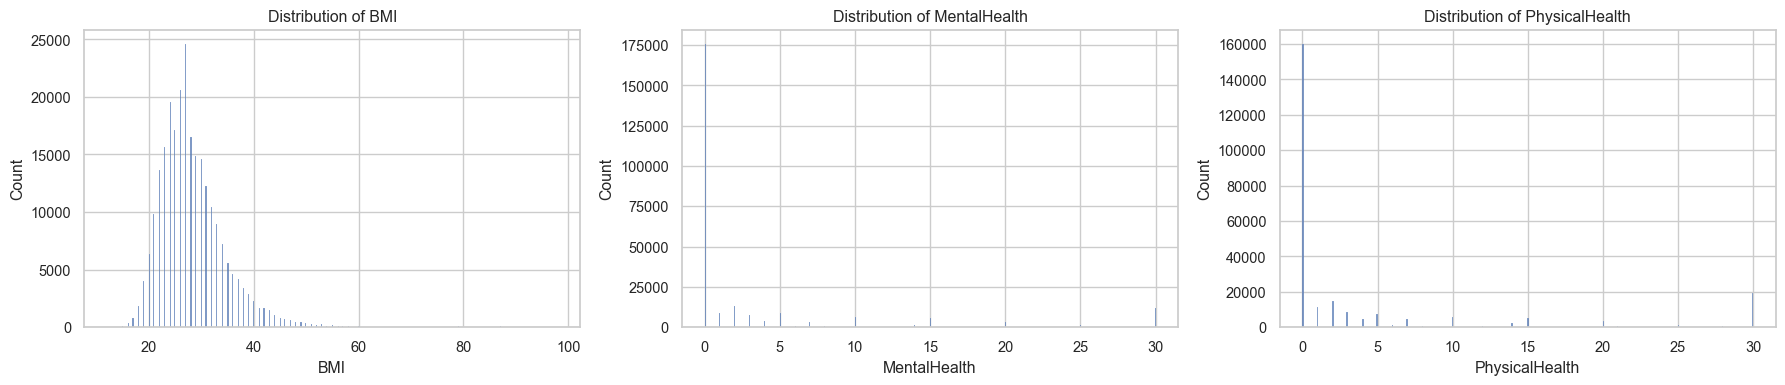

In [57]:
cols_to_plot = ['BMI', 'MentalHealth', 'PhysicalHealth']

fig, axes = plt.subplots(1, len(cols_to_plot), figsize=(18, 4))
if len(cols_to_plot) == 1:
    axes = [axes]

for i, col in enumerate(cols_to_plot):
    sns.histplot(df[col], ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

plt.tight_layout()
plt.show()

As shown in the distribution plots of MentalHealth and PhysicalHealth, both variables are highly skewed and present clear heaping effects, with responses concentrated on small integers (1–5) and rounded values such as 10, 20, and 30 days. This behavior is typical of self-reported survey data.

To address this issue, both variables were discretized into ordinal categories representing ranges of days with poor mental or physical health. This reduces noise caused by rounding, preserves the ordinal structure, and simplifies their interpretation for the classification models.

In [58]:
# Funciones para discretizar MentalHealth y Physicalhealth
def discretize_numerical_features(value):
    """
    Discretiza los días de salud mental en categorías de 5 días:
    0: (0 días)
    1: (1-5 días)
    2: (6-10 días)
    3: (11-15 días)
    4: (16-20 días)
    5: (21-25 días)
    6: (26-30 días)
    """
    if value == 0:
        return 0
    elif 1 <= value <= 5:
        return 1
    elif 6 <= value <= 10:
        return 2
    elif 11 <= value <= 15:
        return 3
    elif 16 <= value <= 20:
        return 4
    elif 21 <= value <= 25:
        return 5
    else:  # 26-30
        return 6


# Función para actualizar el diccionario JSON con la discretización de MentalHealth
def discretize_in_dict(dict_path='../data/dictionary.json', variable=None):
    """
    Actualiza el diccionario JSON para reflejar que MentalHealth ahora es ordinal
    con categorías discretas de 5 días.
    
    Parameters:
    -----------
    dict_path : str
        Ruta al archivo dictionary.json
    """
    import json
    
    # Leer el JSON actual
    with open(dict_path, 'r') as f:
        data_dict = json.load(f)
    
    # Actualizar MentalHealth
    data_dict[variable] = {
        "type": "ordinal",
        "map": {
            "0": "0",
            "1": "1-5",
            "2": "6-10",
            "3": "11-15",
            "4": "16-20",
            "5": "21-25",
            "6": "26-30"
        },
        "description": f"Discretized {variable} (5-day groups). 0 = 0 days, 1 = 1-5 days, 2 = 6-10 days, 3 = 11-15 days, 4 = 16-20 days, 5 = 21-25 days, 6 = 26-30 days"
    }
    
    # Guardar el JSON actualizado
    with open(dict_path, 'w') as f:
        json.dump(data_dict, f, indent=2)
    
    print(f"✅ Diccionario JSON actualizado con {variable}")


In [59]:
# Aplicar discretización
df['MentalHealth'] = df['MentalHealth'].apply(discretize_numerical_features)
df['PhysicalHealth'] = df['PhysicalHealth'].apply(discretize_numerical_features)

discretize_in_dict(variable='MentalHealth')
discretize_in_dict(variable='PhysicalHealth')

for var in ['MentalHealth', 'PhysicalHealth']:
    if var in numerical_vars:
        numerical_vars.remove(var)
    if var not in ordinal_vars:
        ordinal_vars.append(var)

# numerical_vars.remove('MentalHealth')
# numerical_vars.remove('PhysicalHealth')


print(numerical_vars)
print(ordinal_vars)

✅ Diccionario JSON actualizado con MentalHealth
✅ Diccionario JSON actualizado con PhysicalHealth
['BMI']
['GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'Age', 'Education', 'Income']


In [60]:
# #Guardar el dataset limpio

df.to_csv('../data/diabetes_012_cleaned.csv', index=False)
print("✅ Dataset limpio guardado en '../data/diabetes_012_cleaned.csv'")

✅ Dataset limpio guardado en '../data/diabetes_012_cleaned.csv'


Distribution of the binary features

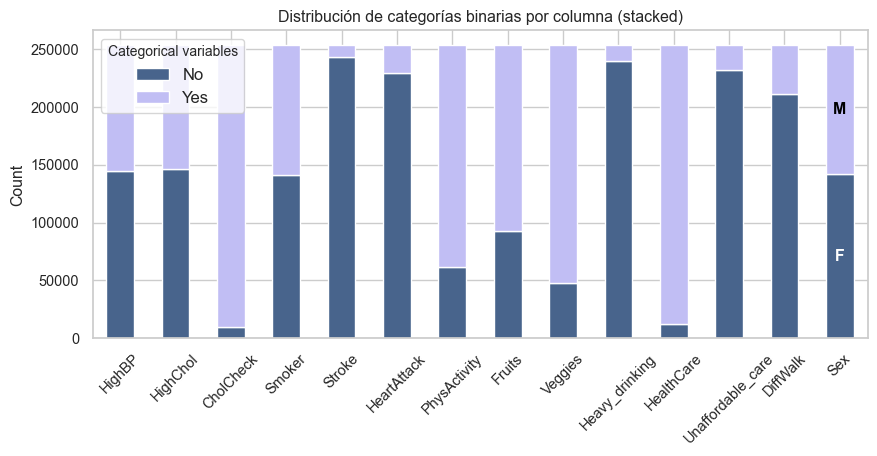

In [61]:
cat_counts = pd.DataFrame({col: df[col].value_counts() for col in categorical_vars if df[col].nunique() == 2}).T.fillna(0)
# cat_counts.plot(kind="bar", stacked=True, figsize=(10,4), color = ["#48648c", "#c1bef4"])

ax = cat_counts.plot(
    kind="bar",
    stacked=True,
    figsize=(10,4),
    color=["#48648c", "#c1bef4"]
)

plt.ylabel("Count")
plt.xticks(rotation=45)
plt.title("Distribución de categorías binarias por columna (stacked)")
plt.legend(labels=['No', 'Yes'], title='Categorical variables', fontsize=12, title_fontsize=10) 

last_col_index = len(cat_counts.index) - 1
no_count = cat_counts.iloc[last_col_index, 0]
yes_count = cat_counts.iloc[last_col_index, 1]

ax.text(last_col_index,no_count / 2,'F',ha='center',va='center',color='white',fontweight='bold')

# Segmento superior
ax.text(last_col_index,no_count + yes_count / 2,'M',ha='center',va='center',color='black',fontweight='bold')

# plt.tight_layout()
plt.show()

Distribution of the categorical features with 3 or more different categories:

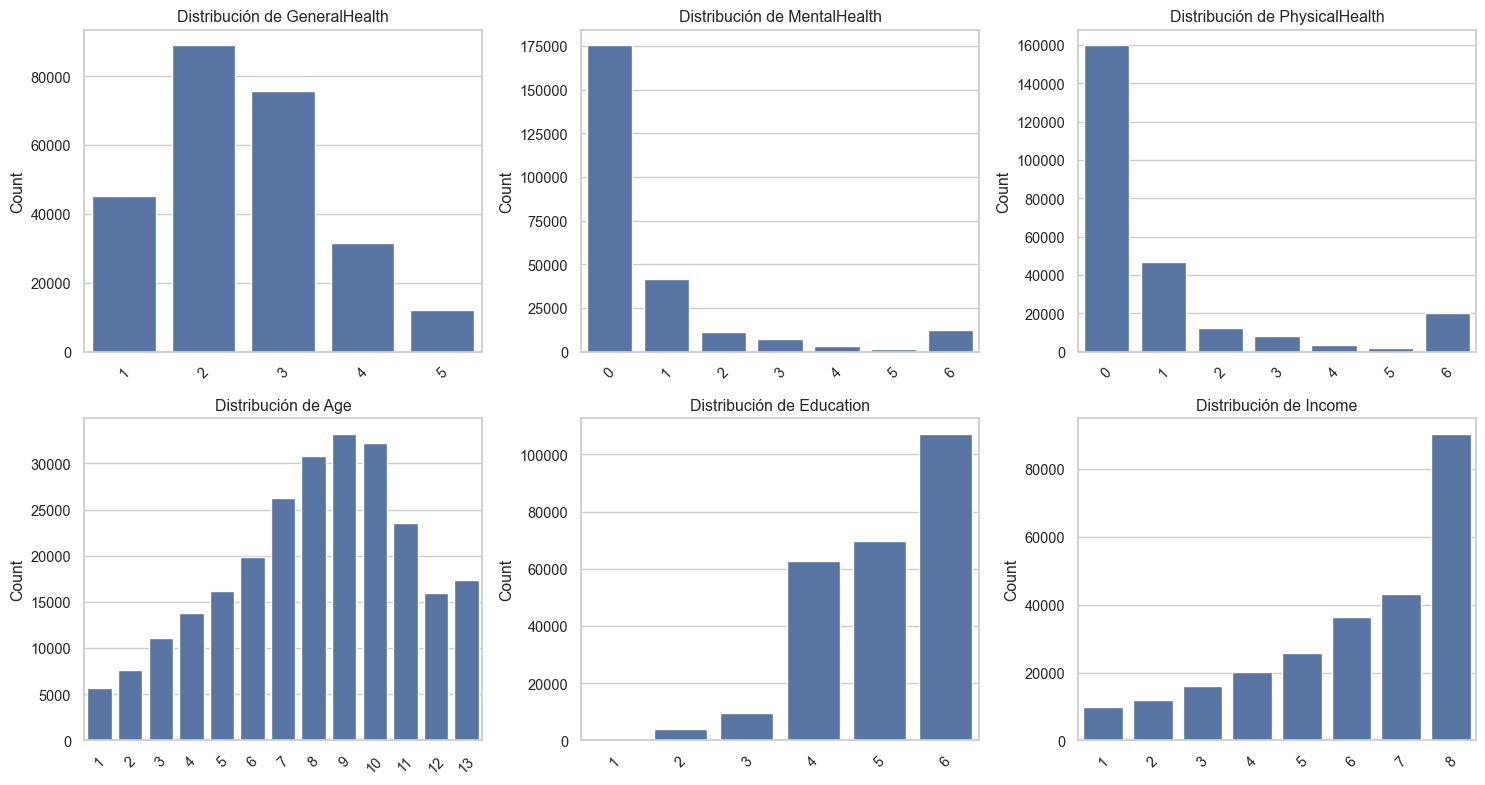

In [62]:
# Número de columnas no binarias
n_cols = len(ordinal_vars)
cols_por_fila = 3
n_filas = math.ceil(n_cols / cols_por_fila)

# Crear la figura y los ejes
fig, axes = plt.subplots(n_filas, cols_por_fila, figsize=(5*cols_por_fila, 4*n_filas))
axes = axes.flatten()  # para iterar fácilmente

for i, col in enumerate(ordinal_vars):
    sns.countplot(data=df, x=col, ax=axes[i])
    axes[i].set_title(f"Distribución de {col}")
    axes[i].set_ylabel("Count")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

#### Normalization and standarization of variables

The numeric variable BMI (Body Mass Index) is standardized to facilitate downstream modeling. Standardization rescales the variable to have a mean of 0 and a standard deviation of 1, which helps models that are sensitive to feature scale (e.g., logistic regression, SVMs, neural networks) converge faster and interpret coefficients more meaningfully. For ordinal variables, Min-Max normalization can be applied if a specific scale-sensitive model requires it, but by default they are left as integers to preserve interpretability without affecting most models.

In [63]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
# scaler = MinMaxScaler()

df_std = df.copy()
df_std[numerical_vars] = scaler.fit_transform(df[numerical_vars])

# ¿DEBERÍAMOS NORMALIZAR TAMBIÉN LAS ORDINALES? 
# scaler = MinMaxScaler()
# df_std[ordinal_vars] = scaler.fit_transform(df[ordinal_vars])

#### Outliers detection

Generando grid de 7 filas (2 bloques) y 4 columnas...


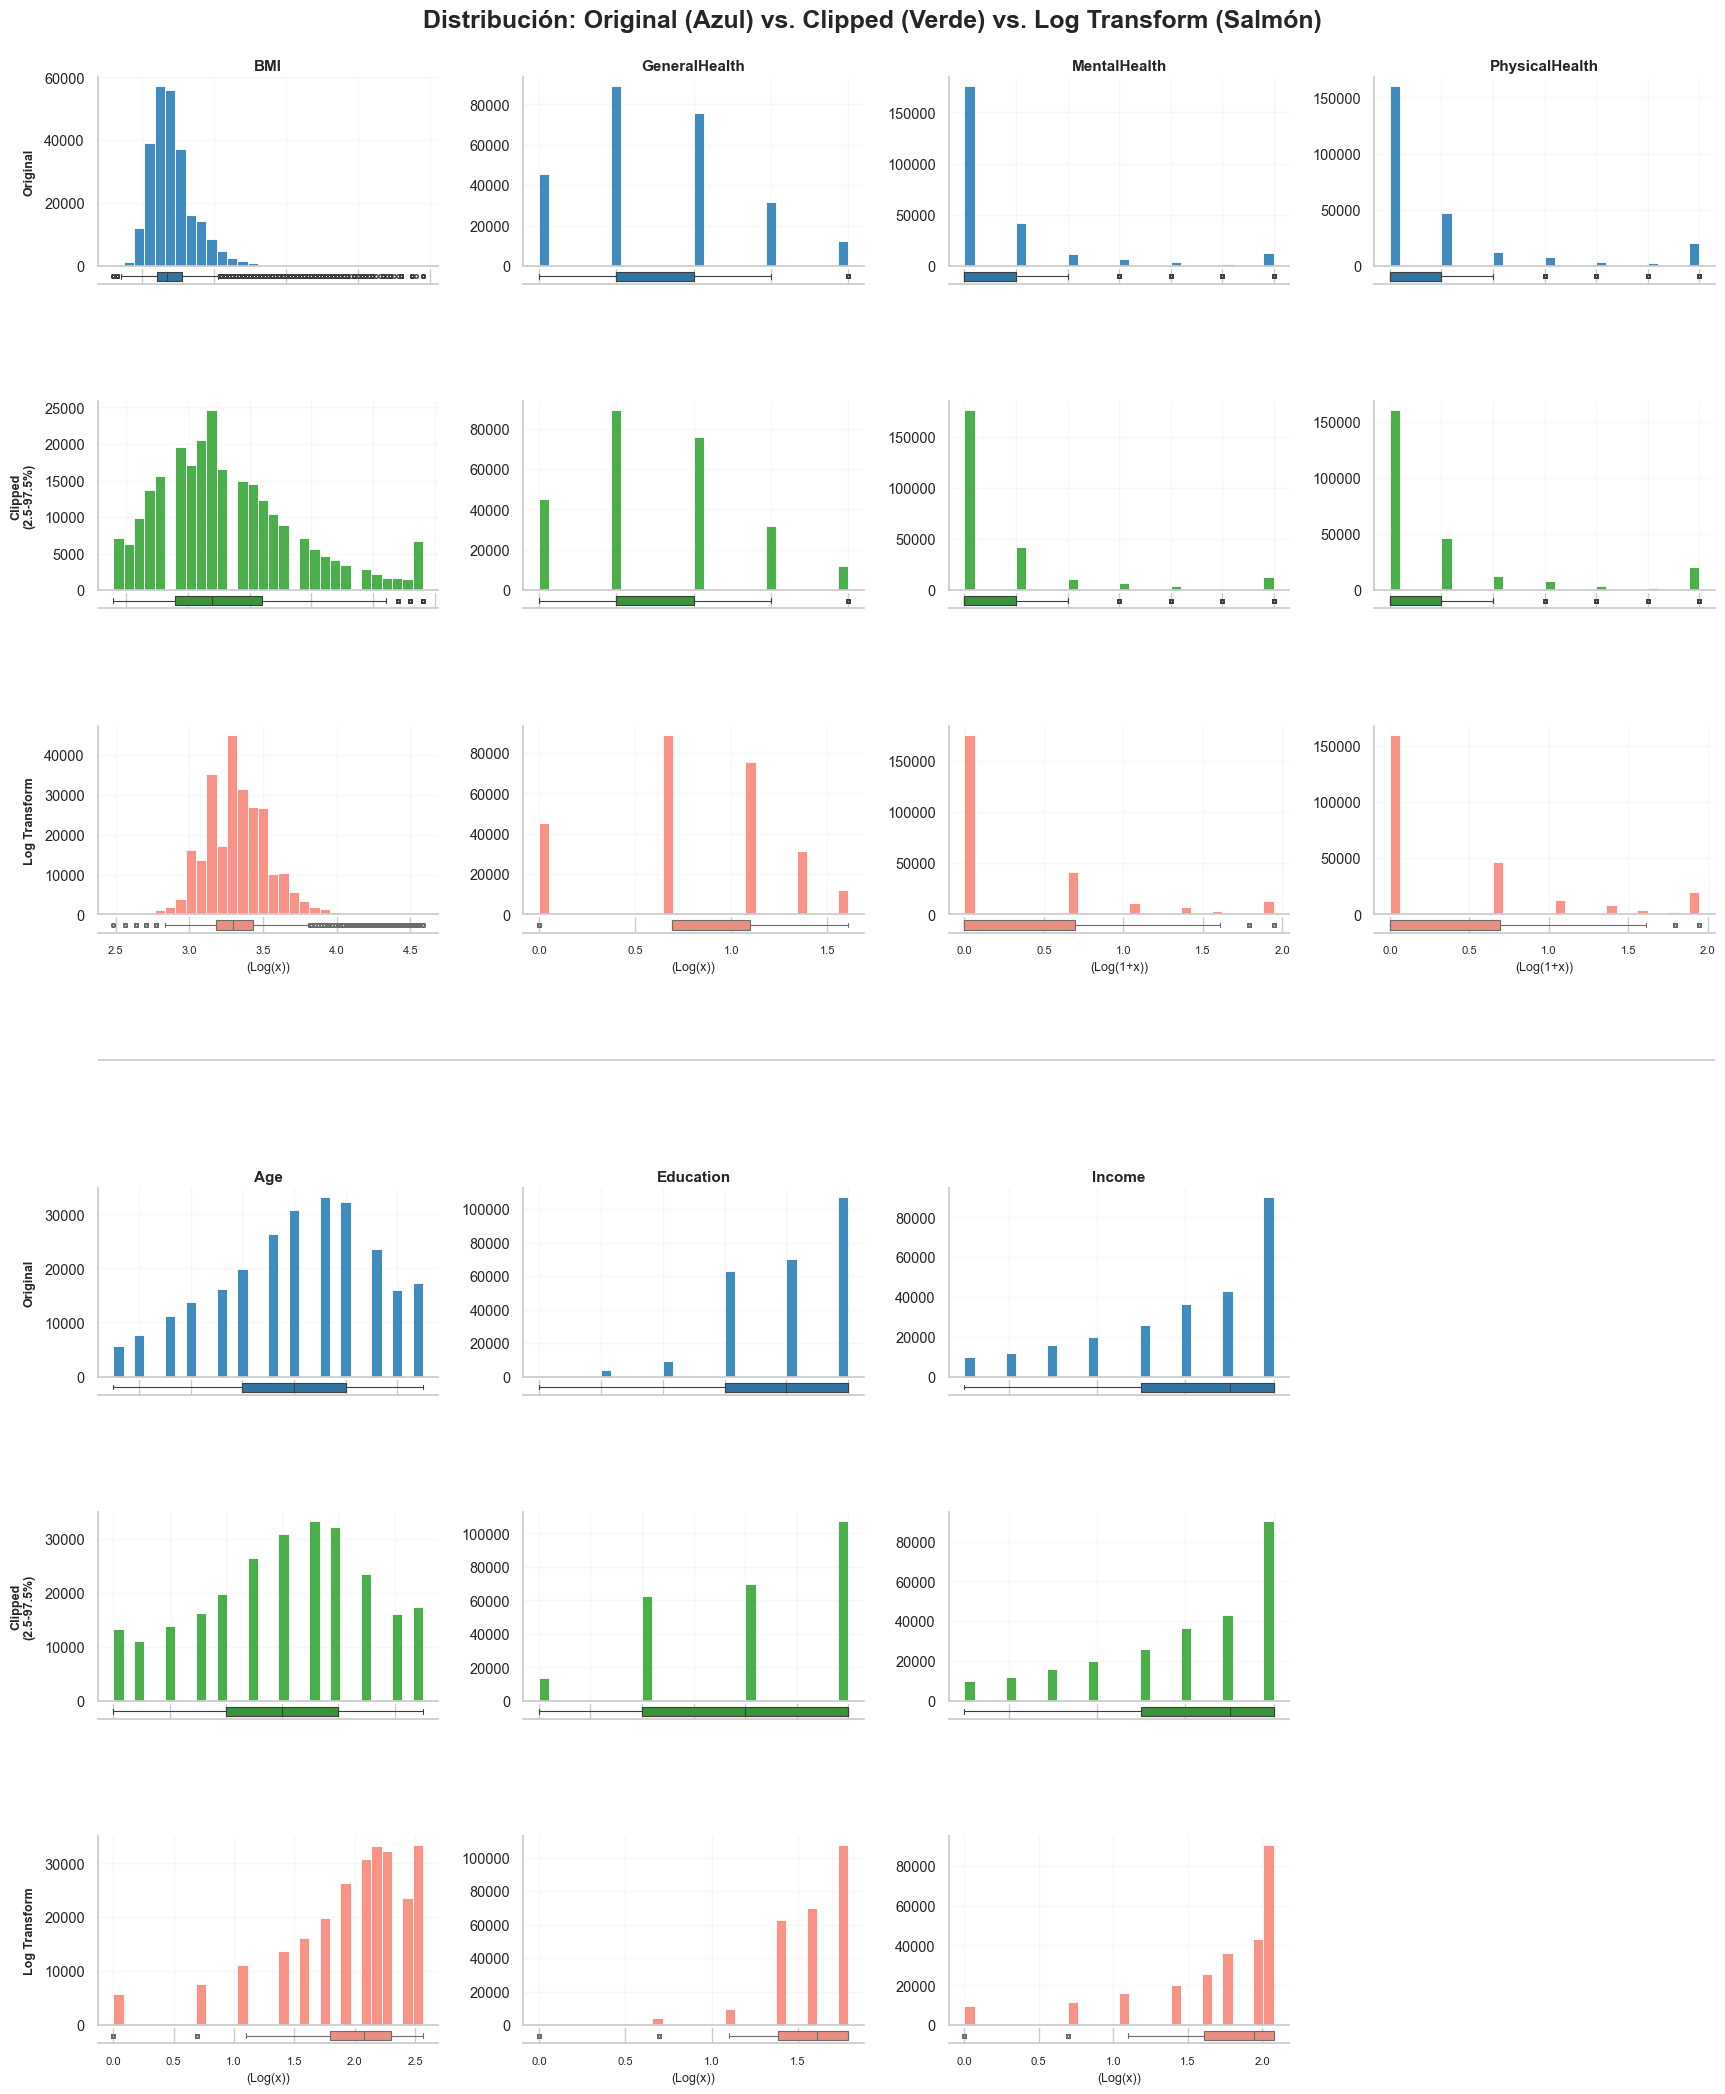

In [64]:
sns.set_theme(style="whitegrid", font_scale=0.95)

cols = 4
num_features = len(numerical_vars + ordinal_vars)
blocks = math.ceil(num_features / cols) # Número de "meta-filas"

# --- Lógica del Grid con Espaciadores ---
total_rows = (blocks * 3) + max(0, blocks - 1)
height_ratios = []
for b in range(blocks):
    height_ratios.extend([1, 1, 1]) # Ratios para [con, sin, log]
    if b < blocks - 1:
        height_ratios.extend([0.1]) # Ratio para el espaciador gris

# Paletas
color_with = "#1f77b4"   # azul
color_without = "#2ca02c" # verde
color_log = "#FA8072"      # rojo salmón

# Histogramas más altos respecto al boxplot
plot_height_ratios = [15, 1.2] # Más alto

# --- Figura y Grid ---
# Ajustar altura total de la figura para acomodar espaciadores
fig_height = (blocks * 10.8) + (max(0, blocks - 1) * 1.0) 
fig = plt.figure(figsize=(cols * 4.3, fig_height))
gs_main = fig.add_gridspec(total_rows, cols, hspace=0.65, wspace=0.25, height_ratios=height_ratios)

print(f"Generando grid de {total_rows} filas ({blocks} bloques) y {cols} columnas...")

for vi, col in enumerate(numerical_vars + ordinal_vars):
    block = vi // cols
    col_pos = vi % cols
    
    # Índices de fila ajustados para el espaciador
    row_con = block * 4
    row_sin = row_con + 1
    row_log = row_con + 2

    # --- Recorte de outliers (para fila 2) ---
    try:
        q_low, q_high = df[col].quantile(0.025), df[col].quantile(0.975)
        clipped = df[col].clip(q_low, q_high)
        clip_error = None
    except Exception as e:
        clipped = df[col] # Fallback
        clip_error = str(e)

    # --- Transformación Logarítmica (para fila 3) ---
    log_data = None
    log_label = "Log(x)"
    log_error = None
    try:
        min_val = df[col].min()
        if min_val > 0:
            log_data = np.log(df[col])
            log_label = "Log(x)"
        elif min_val >= 0:
            log_data = np.log1p(df[col])
            log_label = "Log(1+x)"
        else:
            shift = abs(min_val) + 1
            log_data = np.log(df[col] + shift)
            log_label = f"Log(x + {shift:.1f})"
    except Exception as e:
        log_error = str(e)


    # ===== 1. BLOQUE CON OUTLIERS (Azul) =====
    gs_con = gs_main[row_con, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_with = fig.add_subplot(gs_con[0, 0])
    ax_box_with = fig.add_subplot(gs_con[1, 0], sharex=ax_hist_with)

    try:
        sns.histplot(df[col], bins=30, ax=ax_hist_with,
                     color=color_with, alpha=0.85, line_kws={'linewidth': 1.3})
        # Título de la columna, solo en el plot superior
        ax_hist_with.set_title(f"{col}", fontsize=11, weight='semibold', pad=5) 
        ax_hist_with.set_xlabel('')
        ax_hist_with.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_with.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_with.set_ylabel('Original', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_with.set_ylabel('')
        sns.despine(ax=ax_hist_with)
    except Exception as e:
        ax_hist_with.set_title(f"{col}\n(Error: {e})", fontsize=10, color='red')

    sns.boxplot(x=df[col], ax=ax_box_with, color=color_with, fliersize=2.5, linewidth=0.8, width=0.6)
    ax_box_with.set_yticks([])
    ax_box_with.set_xlabel('')
    ax_box_with.tick_params(axis='x', labelsize=8, bottom=False, labelbottom=False) 
    sns.despine(ax=ax_box_with, left=True, top=True, right=True)


    # ===== 2. BLOQUE SIN OUTLIERS (Verde) =====
    gs_sin = gs_main[row_sin, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_without = fig.add_subplot(gs_sin[0, 0])
    ax_box_without = fig.add_subplot(gs_sin[1, 0], sharex=ax_hist_without)

    try:
        data_to_plot = clipped if clip_error is None else df[col]
        sns.histplot(data_to_plot, bins=30, ax=ax_hist_without,
                     color=color_without, alpha=0.85, line_kws={'linewidth': 1.3})
        ax_hist_without.set_title('') # Sin título aquí
        if clip_error:
             ax_hist_without.set_title(f"(Error clip: {clip_error})", fontsize=10, color='red')
        ax_hist_without.set_xlabel('')
        ax_hist_without.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_without.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_without.set_ylabel('Clipped\n(2.5-97.5%)', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_without.set_ylabel('')
        sns.despine(ax=ax_hist_without)
    except Exception as e:
        ax_hist_without.set_title(f"(Error plot: {e})", fontsize=10, color='red')

    sns.boxplot(x=data_to_plot, ax=ax_box_without, color=color_without, fliersize=2.5, linewidth=0.8, width=0.6)
    ax_box_without.set_yticks([])
    ax_box_without.set_xlabel('')
    ax_box_without.tick_params(axis='x', labelsize=8, bottom=False, labelbottom=False) 
    sns.despine(ax=ax_box_without, left=True, top=True, right=True)


    # ===== 3. BLOQUE CON LOG TRANSFORM (Salmón) =====
    gs_log = gs_main[row_log, col_pos].subgridspec(2, 1, height_ratios=plot_height_ratios, hspace=0.03)
    ax_hist_log = fig.add_subplot(gs_log[0, 0])
    ax_box_log = fig.add_subplot(gs_log[1, 0], sharex=ax_hist_log)

    try:
        if log_error:
            raise Exception(log_error)
        
        sns.histplot(log_data,  bins=30, ax=ax_hist_log,
                     color=color_log, alpha=0.85, line_kws={'linewidth': 1.3})
        ax_hist_log.set_title('') # Sin título aquí
        ax_hist_log.set_xlabel('')
        ax_hist_log.tick_params(axis='x', bottom=False, labelbottom=False)
        ax_hist_log.grid(alpha=0.15)
        if col_pos == 0:
            ax_hist_log.set_ylabel('Log Transform', fontsize=9, weight='bold', labelpad=6)
        else:
            ax_hist_log.set_ylabel('')
        sns.despine(ax=ax_hist_log)
    except Exception as e:
        ax_hist_log.set_title(f"(Error Log: {e})", fontsize=10, color='red')

    if log_data is not None:
        # --- CORRECCIÓN AQUÍ ---
        # Cambiado de 'ax_log_box' a 'ax_box_log'
        sns.boxplot(x=log_data, ax=ax_box_log, color=color_log, fliersize=2.5, linewidth=0.8, width=0.6)
    
    ax_box_log.set_yticks([])
    # Etiqueta X solo con la transformación, el nombre de la col ya está arriba
    ax_box_log.set_xlabel(f"({log_label})", fontsize=9) 
    ax_box_log.tick_params(axis='x', labelsize=8)
    sns.despine(ax=ax_box_log, left=True, top=True, right=True)


# Ocultar huecos vacíos
for i in range(num_features, blocks * cols):
    block_num = i // cols
    col_num = i % cols
    for row_offset in [0, 1, 2]: # Ocultar las 3 filas de plot
        try:
            ax = fig.add_subplot(gs_main[block_num * 4 + row_offset, col_num])
            ax.set_visible(False)
        except:
            pass

# --- Añadir líneas separadoras ---
for b in range(blocks - 1):
    spacer_row_index = (b * 4) + 3 # Índice de la fila espaciadora
    ax_spacer = fig.add_subplot(gs_main[spacer_row_index, :]) # Span all columns
    ax_spacer.axhline(0.5, color='#CCCCCC', linewidth=1.2)
    ax_spacer.axis('off')

# Título más pegado a los plots
plt.suptitle("Distribución: Original (Azul) vs. Clipped (Verde) vs. Log Transform (Salmón)",
             fontsize=18, weight='bold', y=0.97) 
fig.subplots_adjust(top=0.94, bottom=0.07, left=0.05, right=0.99)

plt.show()



#### Correlation analysis

We will evaluate the correlations both between the explanatory variables and the target variable, as well as among the explanatory variables themselves. Using a heatmap, this analysis helps identify which features are most related to the target and also detect strong interdependencies between predictors that could affect model performance.

C:\Users\julia\AppData\Local\Temp\ipykernel_21220\2282197755.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\julia\AppData\Local\Temp\ipykernel_21220\2282197755.py:23: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(


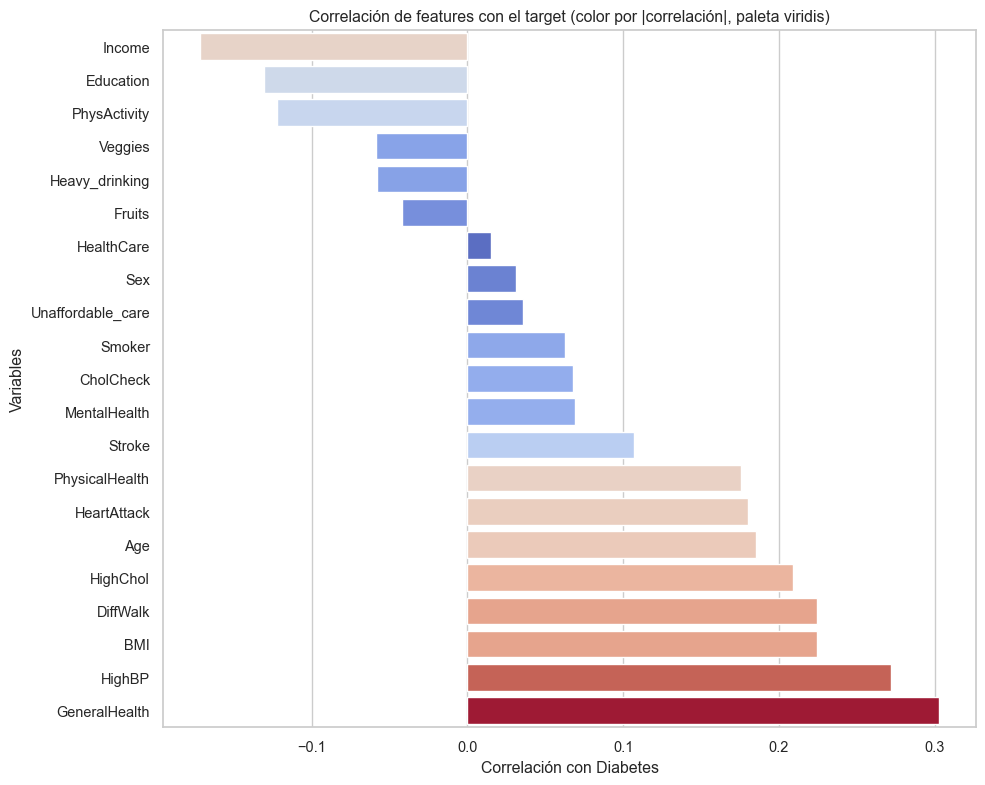

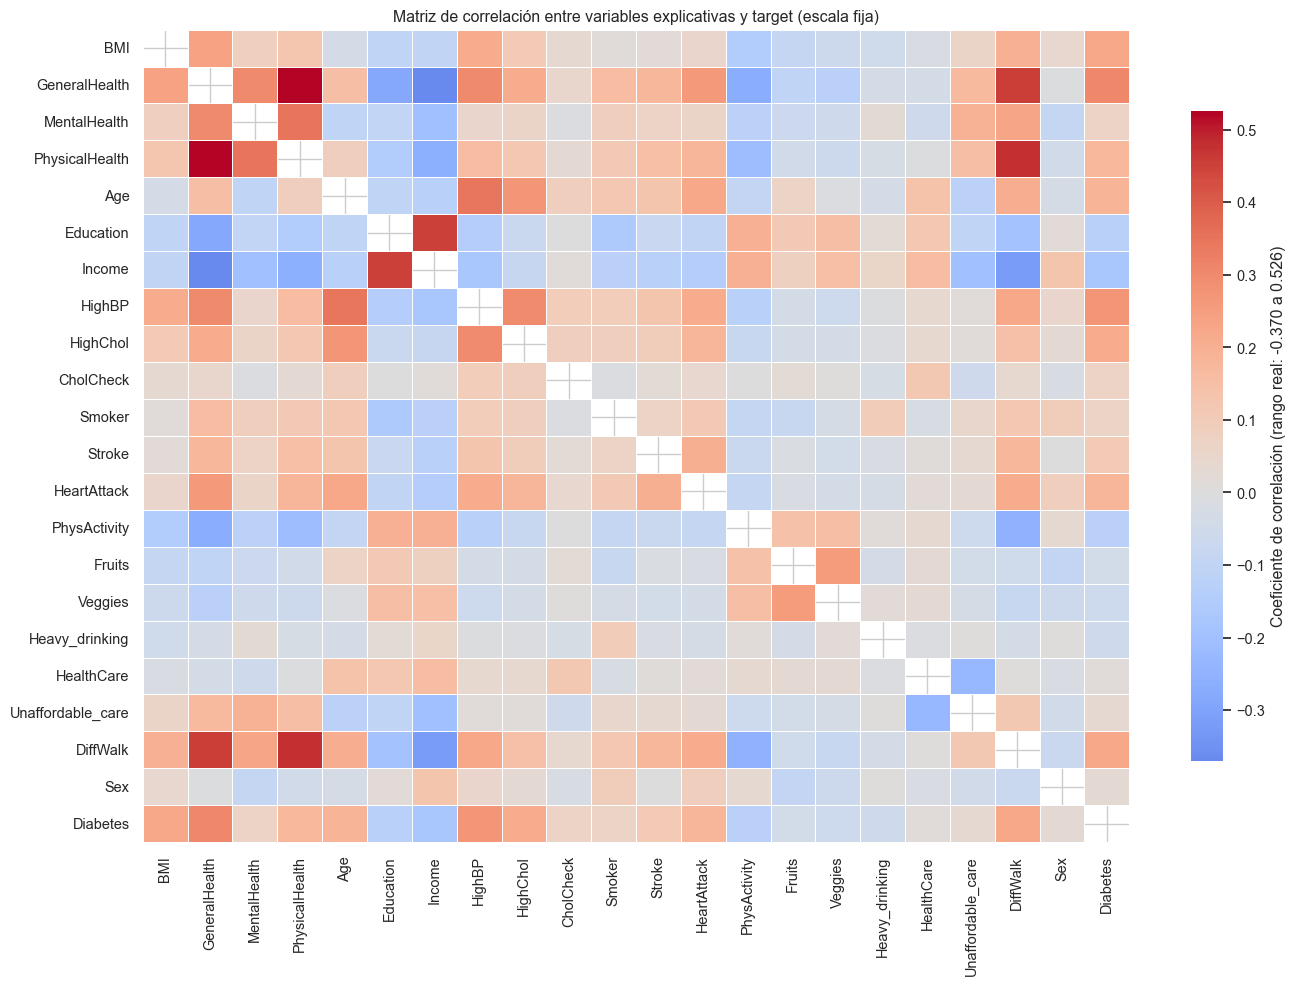

In [65]:
# --- Correlación de variables explicativas con la target ---
cols_to_corr = numerical_vars + ordinal_vars + categorical_vars + [TARGET_COL]

corr_matrix = df[cols_to_corr].corr()
corr_with_target = corr_matrix[TARGET_COL].sort_values(ascending=True)

# print(f"\n--- Correlación de las variables con la variable target (orientado a FSS) ---")
# print(corr_with_target.drop(TARGET_COL))

# ==========  BARRAS DE CORRELACIÓN CON LA VARIABLE OBJETIVO =========
corr_vals = corr_with_target.drop(TARGET_COL)

# Normalizar valores para mapear a color (usando magnitud)
norm = plt.Normalize(vmin=0, vmax=corr_vals.abs().max())

# Paleta alternativa: viridis, plasma, magma, inferno, cividis, crest...
# cmap = plt.cm.viridis  
cmap = plt.cm.coolwarm  

colors = cmap(norm(corr_vals.abs()))

plt.figure(figsize=(10, 8))
sns.barplot(
    x=corr_vals,
    y=corr_vals.index,
    orient="h",
    palette=colors
)
plt.title("Correlación de features con el target (color por |correlación|, paleta viridis)")
plt.xlabel("Correlación con Diabetes")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


# ==========  HEATMAP DE CORRELACIÓN ENTRE LAS VARIABLES ================

plt.figure(figsize=(14, 10))

# Obtener valores fuera de la diagonal
corr_no_diag = corr_matrix.where(~np.eye(corr_matrix.shape[0], dtype=bool))
mask = np.eye(corr_matrix.shape[0], dtype=bool)


# Calcular escala real mínima y máxima
vmin = corr_no_diag.min().min()   # mínimo fuera de la diagonal
vmax = corr_no_diag.max().max()   # máximo fuera de la diagonal

ax = sns.heatmap(
    corr_matrix,
    annot=False,
    cmap="coolwarm",
    center=0,
    mask=mask,
    linewidths=0.5,
    cbar=True,
    vmin=vmin,        # escala basada en correlaciones reales
    vmax=vmax,
    cbar_kws={
        "shrink": 0.8,
        "label": f"Coeficiente de correlación (rango real: {vmin:.3f} a {vmax:.3f})"
    }
)
plt.title("Matriz de correlación entre variables explicativas y target (escala fija)")
plt.tight_layout()
plt.show()


From these two plots, we can observe relevant information about the relationships between variables. Physical health, general health, and difficulty walking show a high degree of correlation among themselves. There is also a noticeable negative correlation between Income anda DiffWalk and GeneralHealth. Regarding the target variable, general health appears to be the feature most strongly correlated with it. While these correlations do not provide definitive conclusions, they should be considered when interpreting the results of the models.

#### Target Balancing

The target variable is imbalanced, so we apply resampling techniques to ensure that each class is sufficiently represented, improving model training and performance without biasing predictions toward the majority class.

C:\Users\julia\AppData\Local\Temp\ipykernel_21220\2801081893.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase', y='Cantidad', data=plot_data, palette='viridis')


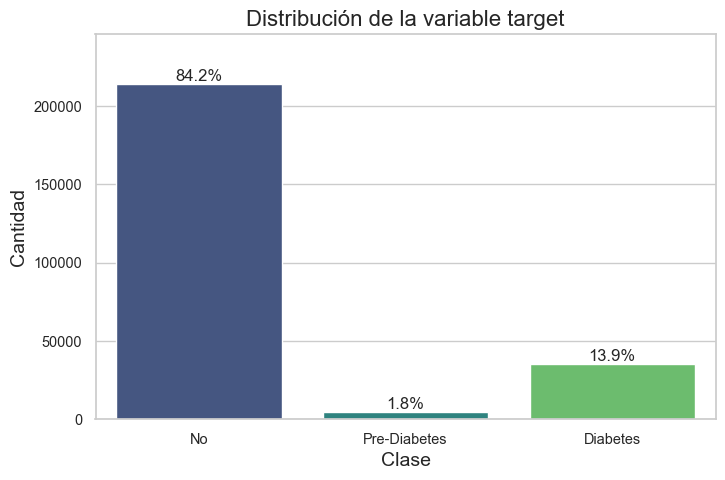

In [66]:
# Contar las clases
class_counts = df[TARGET_COL].value_counts().sort_index()  # Ordena por 0,1,2
class_percent = df[TARGET_COL].value_counts(normalize=True).sort_index() * 100

class_labels = {
    0: data_dict[TARGET_COL]['map']["0"],
    1: data_dict[TARGET_COL]['map']["1"],
    2: data_dict[TARGET_COL]['map']["2"]
}

# Preparar DataFrame para plotting
plot_data = pd.DataFrame({
    'Clase': [class_labels[i] for i in class_counts.index],
    'Cantidad': class_counts.values,
    'Porcentaje': class_percent.values
})

# Crear gráfico
plt.figure(figsize=(8,5))
sns.barplot(x='Clase', y='Cantidad', data=plot_data, palette='viridis')

# Añadir porcentaje sobre cada barra
for index, row in plot_data.iterrows():
    plt.text(x=index, y=row['Cantidad'] + max(class_counts)*0.01, 
             s=f"{row['Porcentaje']:.1f}%", 
             ha='center', fontsize=12)

plt.title('Distribución de la variable target', fontsize=16)
plt.xlabel('Clase', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.ylim(0, max(class_counts)*1.15)  # espacio para etiquetas
plt.show()


Since the main objective is to identify the factors that increase the risk of developing diabetes, the Prediabetes and Diabetes classes were combined into a single category. This is justified because both groups have a high risk of disease, and additionally, the Prediabetes class is extremely underrepresented (1.8%), which would make it difficult for the model to learn meaningful patterns and could lead to overfitting. Combining the two allows for training a more stable model focused on the overall risk of diabetes.

In [67]:
# Crear una copia del DataFrame para no alterar el original
df_mod = df.copy()

# Combinar Prediabetes (1) y Diabetes (2) en una sola clase '2' (Diabetes total)
df_mod[TARGET_COL] = df_mod[TARGET_COL].replace({1: 2, 2: 2})

# Opcional: verificar la distribución de la nueva variable objetivo
print(df_mod[TARGET_COL].value_counts(normalize=True) * 100)
print(df_mod[TARGET_COL].value_counts())

Diabetes
0    84.24117
2    15.75883
Name: proportion, dtype: float64
Diabetes
0    213703
2     39977
Name: count, dtype: int64


Then, to balance the target variable, the number of instances from the majority class (No Diabetes) was reduced and, optionally, the minority class (Total Diabetes) was slightly increased. Given that the dataset contains more than 200,000 instances, undersampling can be applied without a significant loss of information, preventing the majority class from dominating the model’s learning process. Before performing the balancing, the dataset is split into training and test sets to prevent information leakage and ensure an objective evaluation of the model’s performance.

In [68]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# --------------------------------
# Train / Test split (ANTES del balanceo)
# --------------------------------
def balanced_traintest(df, balance_ratio = 1, num_of_cases=12500, test_size=0.2, random_seed=42):

    y = df[TARGET_COL]
    X = df[numerical_vars + categorical_vars + ordinal_vars]

    X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=test_size,
    random_state=random_seed,
    stratify=y
    )

    # --------------------------------
    #Submuestreo de la clase mayoritaria (No Diabetes = 0)
    # --------------------------------
    train_data = X_train.copy()
    train_data[TARGET_COL] = y_train.copy()

    minor_class = train_data[train_data[TARGET_COL] == 2]
    major_class = train_data[train_data[TARGET_COL] == 0]

    major_class_downsampled = major_class.sample(
    n=int(round(num_of_cases/(balance_ratio+1))),
    random_state=random_seed
    )

    if minor_class.shape[0] > int(round(balance_ratio * num_of_cases/(balance_ratio+1))):
        minor_class = minor_class.sample(
        n=int(round(balance_ratio * num_of_cases/(balance_ratio+1))),
        random_state=random_seed
        )

    train_downsampled = pd.concat([major_class_downsampled, minor_class])

    X_down = train_downsampled.drop(columns=[TARGET_COL])
    y_down = train_downsampled[TARGET_COL]

    print(f'Diabetes:{minor_class.shape[0]}')
    print(f'No diabetes:{major_class_downsampled.shape[0]}')
    print(minor_class.shape[0]+major_class_downsampled.shape[0])

    # # --------------------------------
    # # 3️⃣ Sobremuestreo ligero de la clase minoritaria (opcional)
    # # --------------------------------

    if (int(round(balance_ratio * num_of_cases/(balance_ratio+1))) > minor_class.shape[0]) and (minor_class.shape[0] < major_class_downsampled.shape[0] * balance_ratio):
        print("applying smote")
        smote = SMOTE(
        sampling_strategy={0: int(round(num_of_cases/(balance_ratio+1))), 2: int(round(balance_ratio * num_of_cases/(balance_ratio+1)))},
        random_state=random_seed
        )

        X_train_final, y_train_final = smote.fit_resample(X_down, y_down)
        train_final = pd.concat([X_train_final.reset_index(drop=True), y_train_final.reset_index(drop=True)], axis=1)

    else:
        X_train_final, y_train_final = X_down, y_down
        train_final = pd.concat([X_train_final.reset_index(drop=True), y_train_final.reset_index(drop=True)], axis=1)

    #Representacion nueva distribución de la variable target tras el balanceo
    # Conteo y porcentajes
    class_counts = train_final[TARGET_COL].value_counts().sort_index()
    class_percent = train_final[TARGET_COL].value_counts(normalize=True).sort_index() * 100

    # Nombres de las nuevas clases
    class_labels = {
    0: "No Diabetes",
    2: "Diabetes (Prediabetes + Diabetes)"
    }

    # Preparar DataFrame para plotting
    plot_data = pd.DataFrame({
    'Clase': [class_labels[i] for i in class_counts.index],
    'Cantidad': class_counts.values,
    'Porcentaje': class_percent.values
    })

    # Crear gráfico
    plt.figure(figsize=(8,5))
    sns.barplot(x='Clase',y='Cantidad',data=plot_data,palette='viridis')

    # Añadir porcentaje encima de cada barra
    for index, row in plot_data.iterrows():
        plt.text(x=index,y=row['Cantidad'] + max(class_counts) * 0.01,s=f"{row['Porcentaje']:.1f}%",ha='center',fontsize=12)

    plt.title('Distribución de la variable target (clases combinadas)', fontsize=16)
    plt.xlabel('Clase', fontsize=14)
    plt.ylabel('Cantidad', fontsize=14)
    plt.ylim(0, max(class_counts) * 1.15)
    plt.show()

    test_final = X_test.copy()
    test_final[TARGET_COL]= y_test.copy()

    return (train_final, test_final)


Diabetes:6250
No diabetes:6250
12500


C:\Users\julia\AppData\Local\Temp\ipykernel_21220\1344674855.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Clase',y='Cantidad',data=plot_data,palette='viridis')


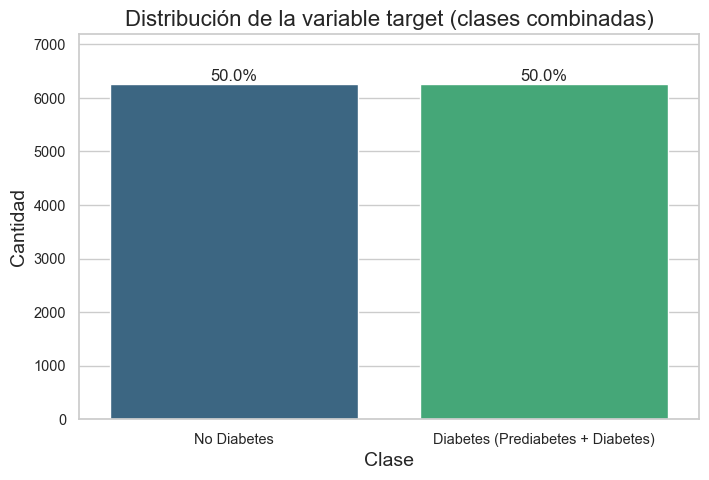

In [69]:
train_final, test_final = balanced_traintest(df_mod, balance_ratio = 1, num_of_cases=12500, test_size=0.2, random_seed=42)

train_final.to_csv("../data/diabetes_train.csv", index=False)
test_final.to_csv("../data/diabetes_test.csv", index=False)


Once our target variable is balanced and the dataset is ready for classification modeling, we can explore how several features are distributed across the target categories. This analysis helps us gain a deeper understanding of the variables and their potential relationship with diabetes risk.

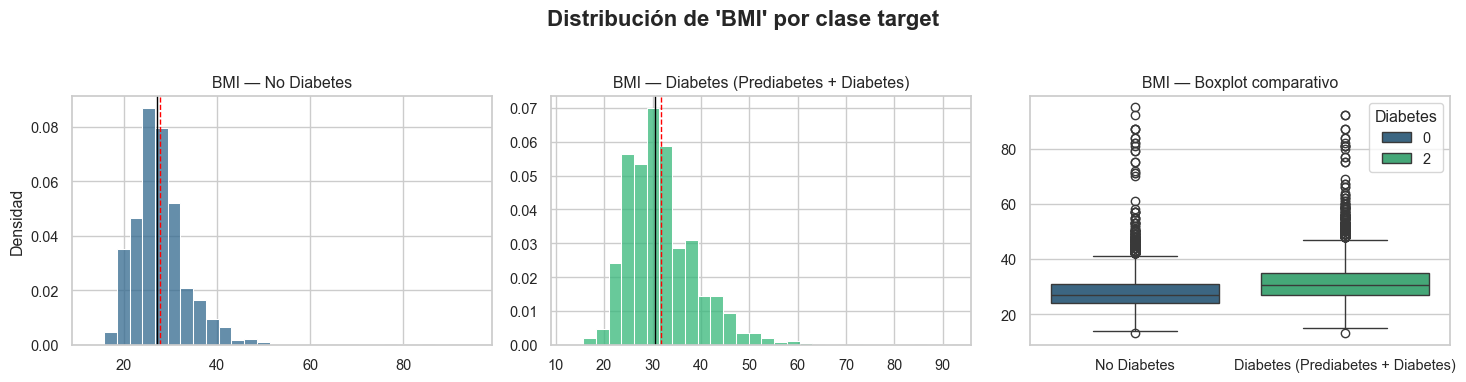

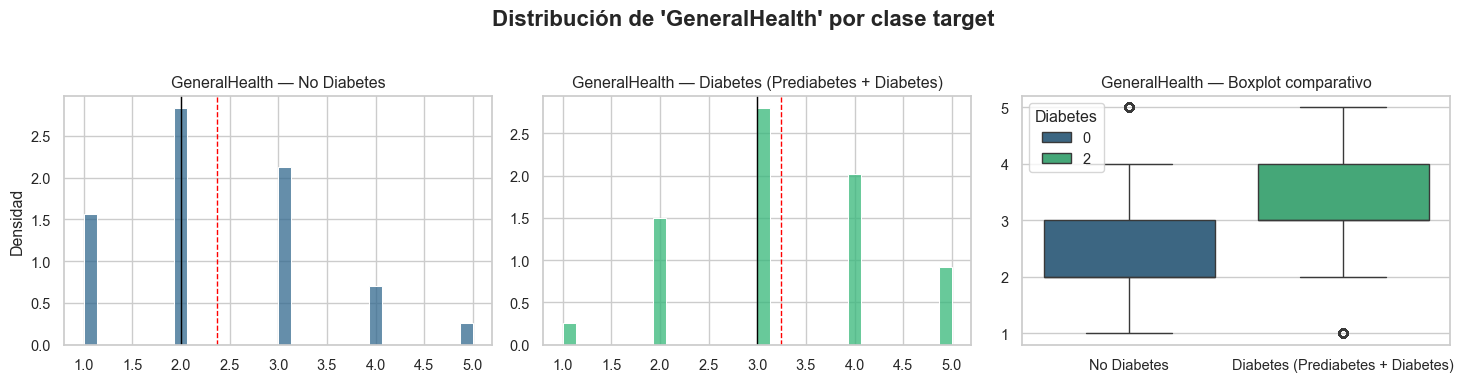

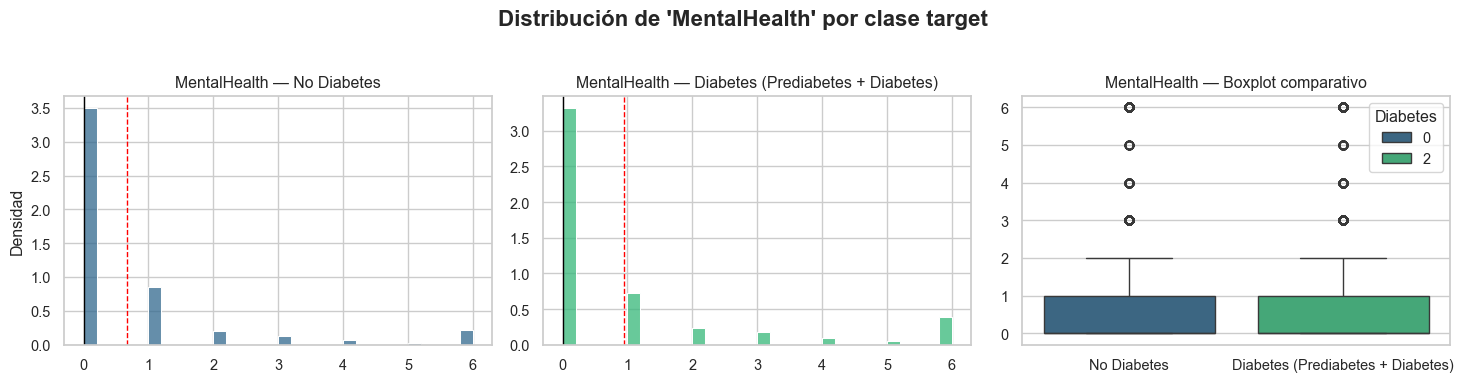

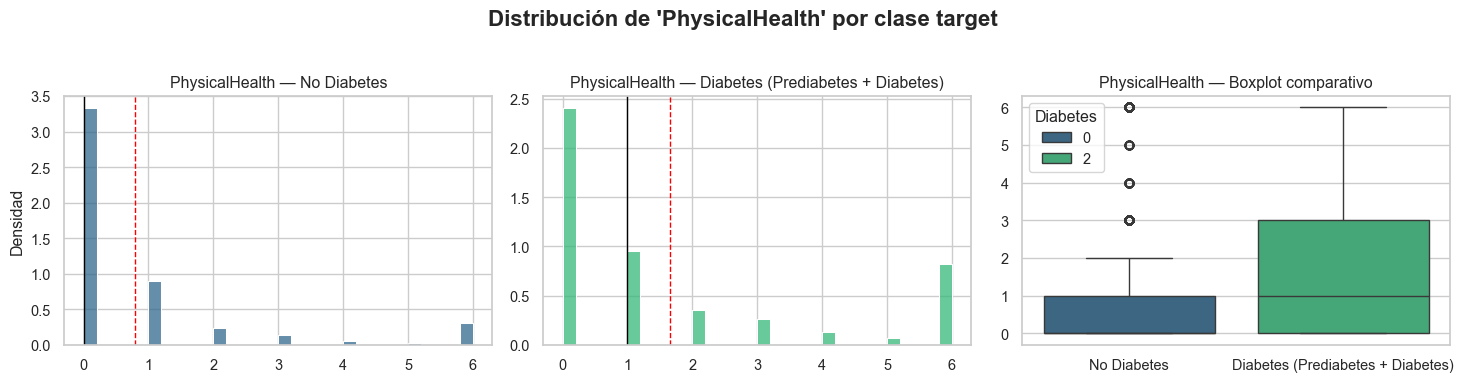

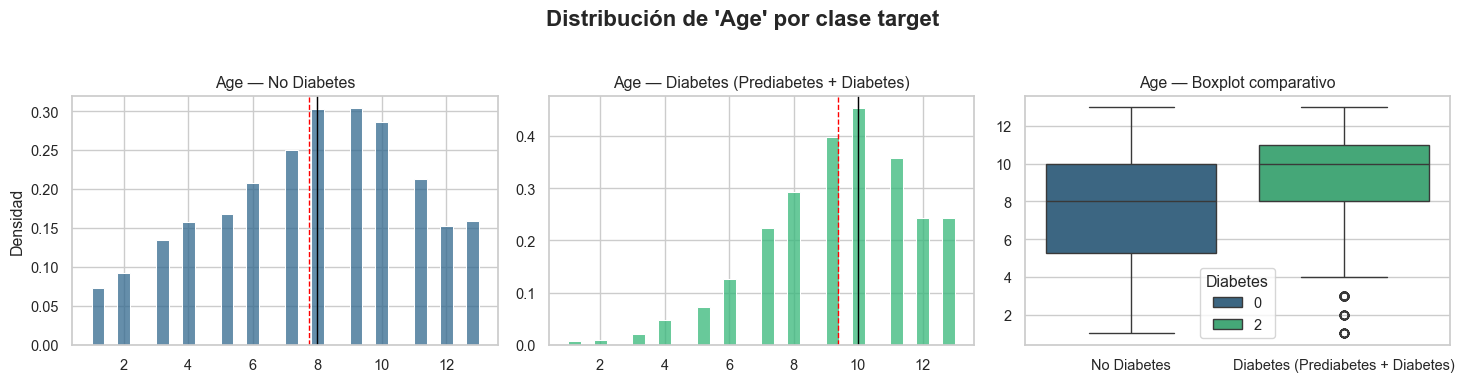

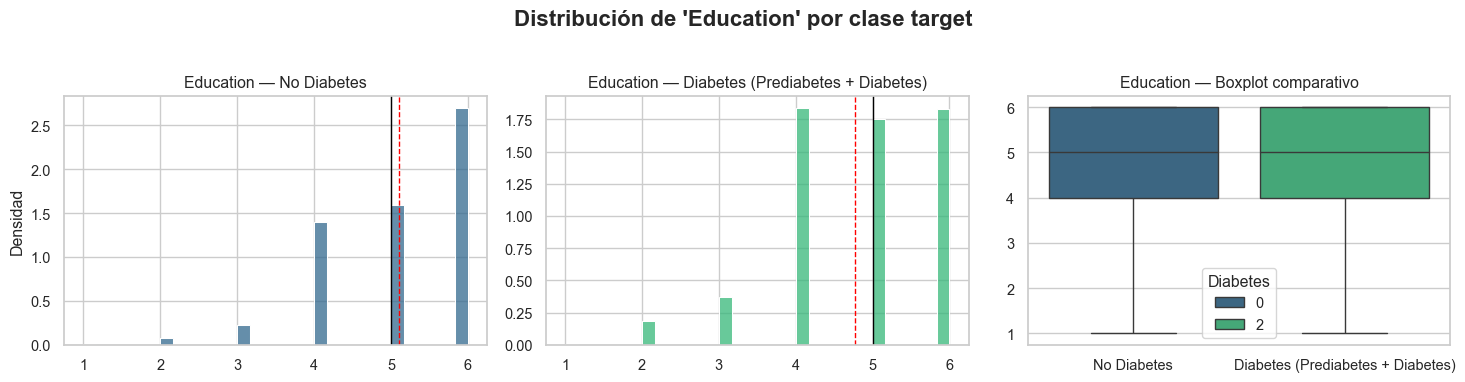

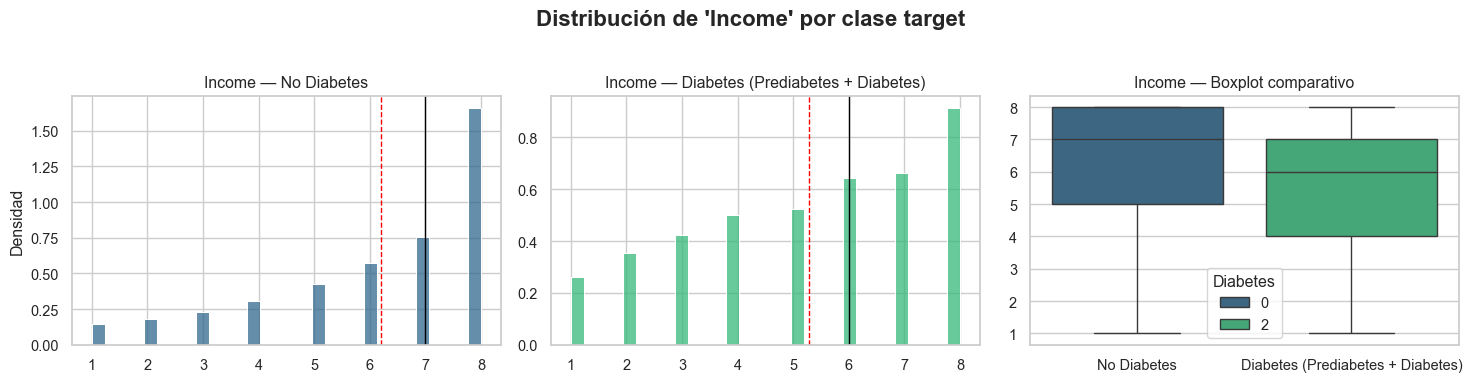

In [70]:
df = train_final.copy()

# Etiquetas de las nuevas clases
class_labels = {
    0: "No Diabetes",
    1: "Diabetes (Prediabetes + Diabetes)"
}

unique_classes = sorted(df[TARGET_COL].dropna().unique())
palette = sns.color_palette('viridis', n_colors=len(unique_classes))

for col in numerical_vars + ordinal_vars:
    fig, axes = plt.subplots(1, 3, figsize=(15,4))
    
    # Histograma clase 0
    subset0 = df[df[TARGET_COL]==0][col].dropna()
    sns.histplot(subset0, bins=30, ax=axes[0], color=palette[0], stat="density")
    axes[0].axvline(subset0.mean(), color='red', linestyle='--', linewidth=1)
    axes[0].axvline(subset0.median(), color='black', linestyle='-', linewidth=1)
    axes[0].set_title(f"{col} — {class_labels[0]}")
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Densidad')
    
    # Histograma clase 2
    subset1 = df[df[TARGET_COL]==2][col].dropna()
    sns.histplot(subset1, bins=30, ax=axes[1], color=palette[1], stat="density")
    axes[1].axvline(subset1.mean(), color='red', linestyle='--', linewidth=1)
    axes[1].axvline(subset1.median(), color='black', linestyle='-', linewidth=1)
    axes[1].set_title(f"{col} — {class_labels[1]}")
    axes[1].set_xlabel('')
    axes[1].set_ylabel('')
    
    # Boxplot comparativo
    sns.boxplot(x=TARGET_COL, y=col, hue=TARGET_COL, data=df, ax=axes[2],
                palette=[palette[0], palette[1]])
    axes[2].set_xticks([0,1])
    axes[2].set_xticklabels([class_labels[0], class_labels[1]])
    axes[2].set_title(f"{col} — Boxplot comparativo")
    axes[2].set_xlabel('')
    axes[2].set_ylabel('')
    
    plt.suptitle(f"Distribución de '{col}' por clase target", fontsize=16, weight='bold')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


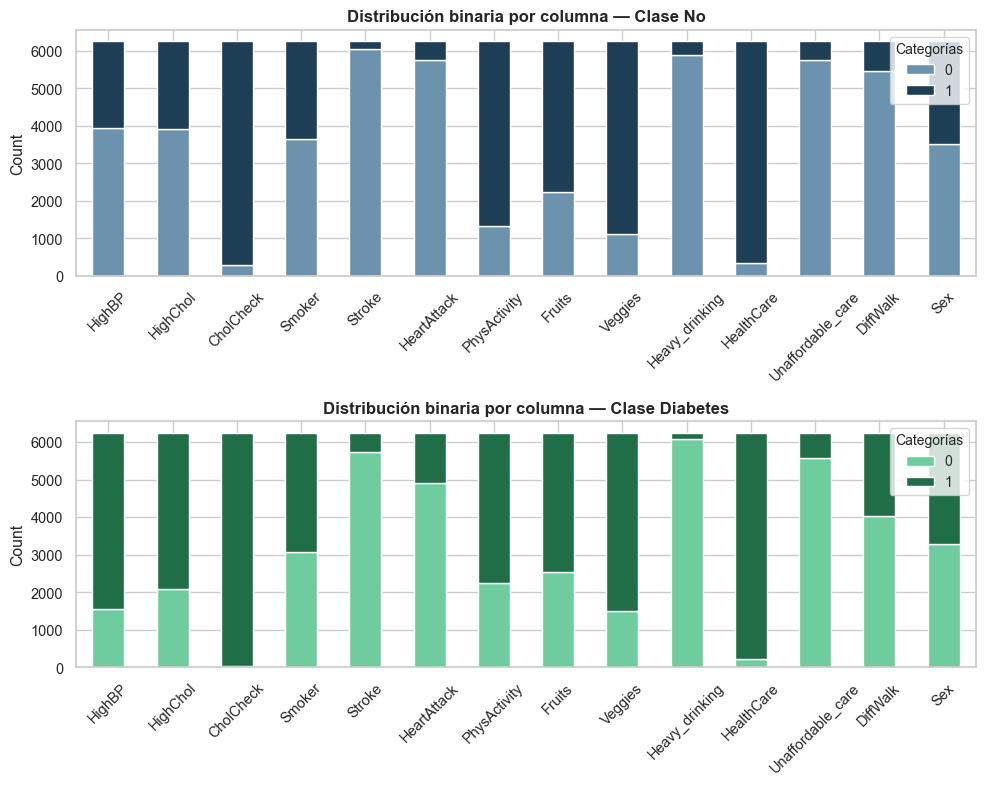

In [71]:
# ====== Distribuciones por clase del target (stacked binary categorical, viridis tones) =======

unique_classes = sorted(df[TARGET_COL].dropna().unique())

# Seleccionar variables categóricas binarias
binary_cats = [col for col in categorical_vars if df[col].nunique(dropna=True) == 2]

if len(binary_cats) == 0:
    raise ValueError("No se han encontrado variables categóricas binarias en 'categorical_vars'.")

# Tomamos los primeros colores de viridis según nº clases
base_colors = sns.color_palette("viridis", n_colors=len(unique_classes))

# Crear tonos claro & oscuro para cada clase
class_colors = {}
for i, cls in enumerate(unique_classes):
    base = np.array(base_colors[i])
    # generar tonos:
    light = (base + 0.40) / 1.40   # aclarado
    dark  = base * 0.60            # oscurecido
    class_colors[cls] = [light, dark]   # [NO, YES]

# Crear figura con una fila por cada clase
n_rows = len(unique_classes)
fig, axes = plt.subplots(n_rows, 1, figsize=(10, 4 * n_rows), squeeze=False)

for i, target_val in enumerate(unique_classes):
    ax = axes[i, 0]

    # Conteos por variable
    cat_counts = pd.DataFrame({
        col: df[df[TARGET_COL] == target_val][col].value_counts(dropna=False)
        for col in binary_cats
    }).T.fillna(0)

    # colores claro (No) y oscuro (Yes) según clase
    colors = class_colors[target_val]
    labels = list(cat_counts.columns.astype(str))  # usa 0/1 reales como etiquetas

    cat_counts.plot(kind="bar", stacked=True, ax=ax, color=colors)

    ax.set_ylabel("Count")
    ax.set_xticklabels(cat_counts.index, rotation=45)
    ax.set_title(f"Distribución binaria por columna — Clase {data_dict[TARGET_COL]['map'].get(str(target_val))}", fontsize=12, weight='bold')
    ax.legend(labels=labels, title='Categorías', fontsize=10, title_fontsize=10, loc='upper right')

plt.tight_layout()
plt.show()



Comparing the proportion of diabetics across variables helps identify group differences relative to the target. In the medical domain, infrequent conditions can be highly informative, so analyzing percentages is more effective than raw counts to avoid overlooking rare but critical patterns.
Given our balanced dataset, any deviation from a 50/50 distribution signals a feature's predictive power so deviations from the middle line in teh next plots will be important to notice.


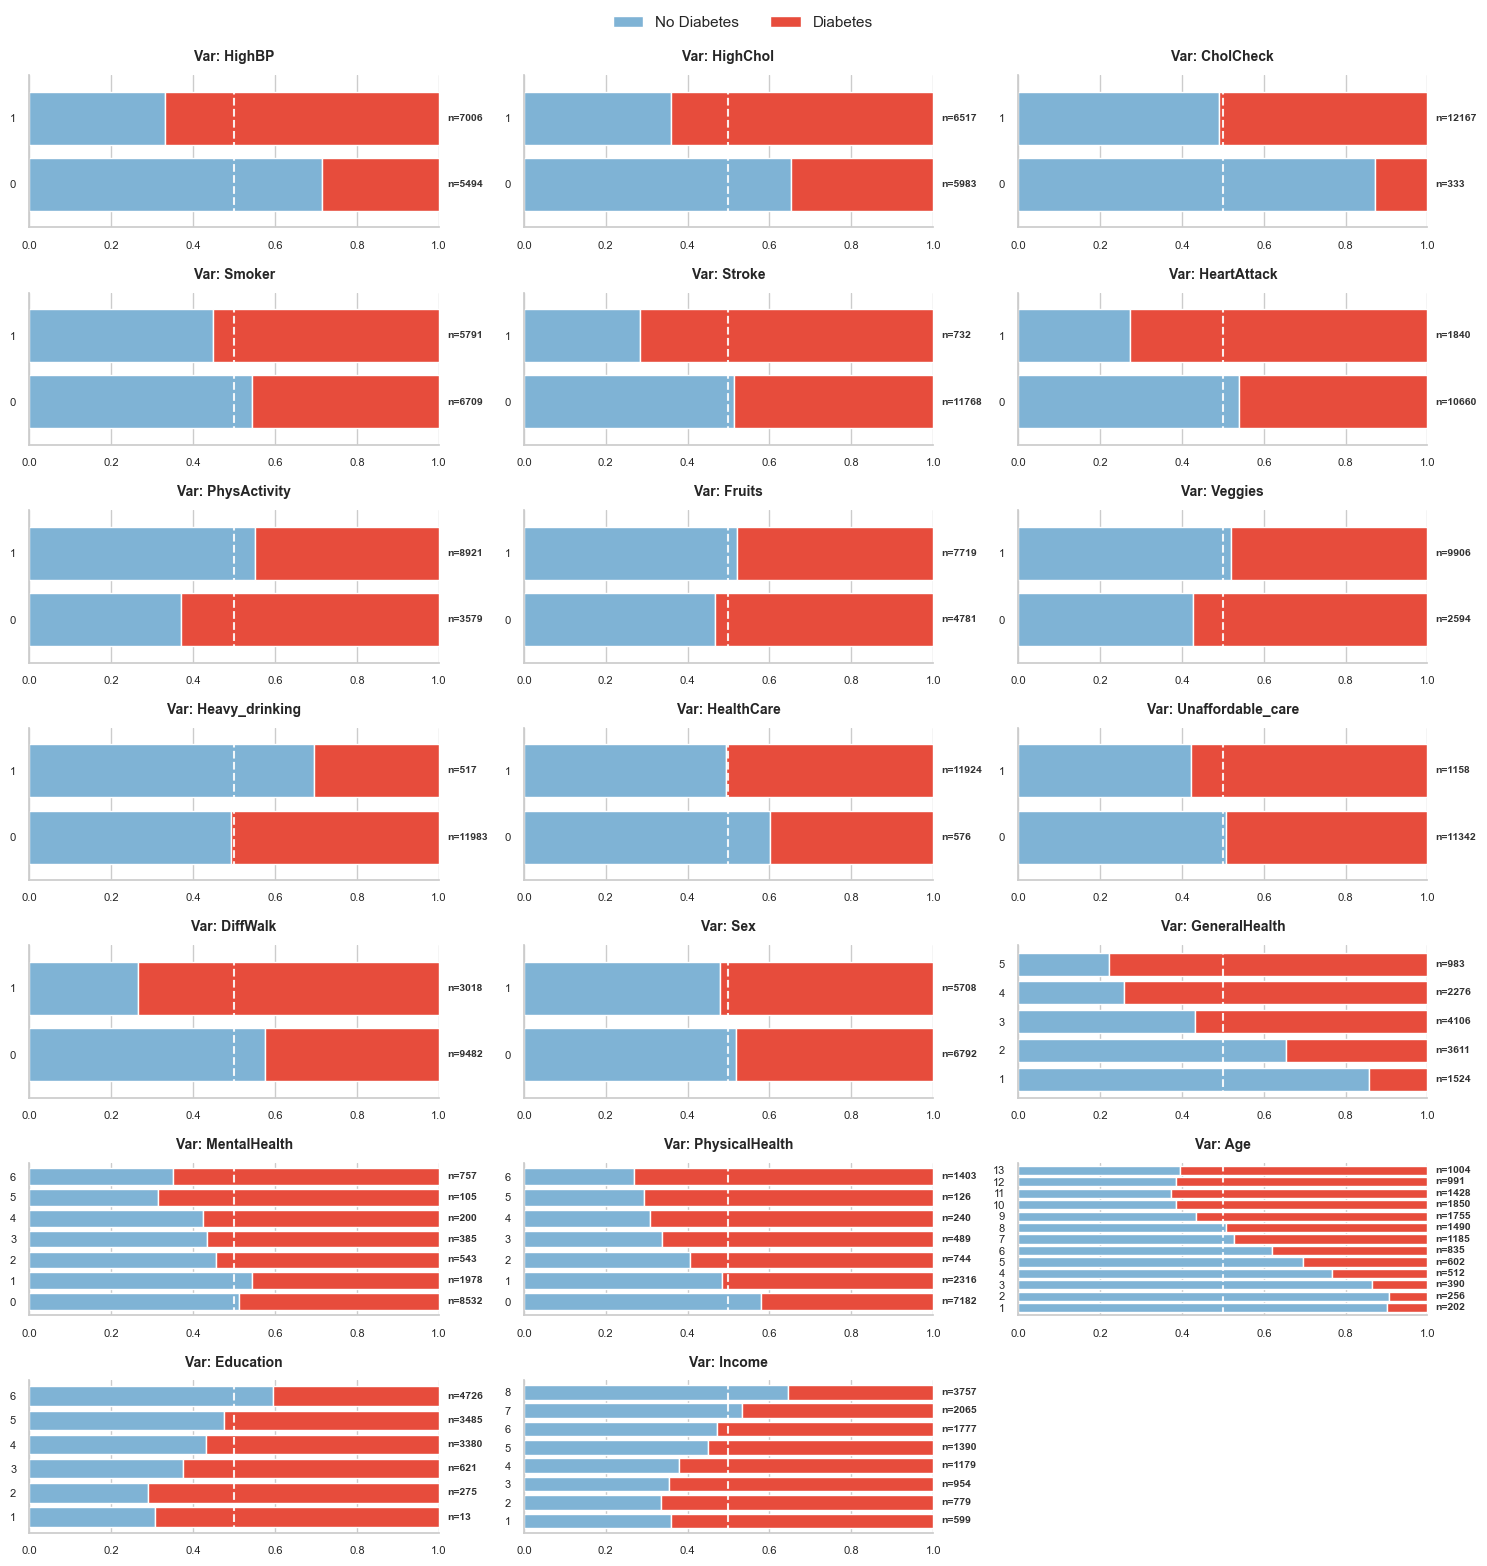

In [72]:

def plot_compact_balanced_analysis(df, variables, target, cols=3):
    """
    Genera una cuadrícula compacta de gráficos de barras normalizados al 100%.
    Ideal para datos balanceados 1:1.
    """
    # 1. Filtrar variables que realmente existen en el DataFrame
    vars_validas = [v for v in variables if v in df.columns]
    
    if not vars_validas:
        print("No se encontraron variables válidas para graficar.")
        return

    # 2. Configuración de la cuadrícula (Grid)
    n_vars = len(vars_validas)
    rows = math.ceil(n_vars / cols)
    
    # Tamaño de celda: 5 de ancho x 2.2 de alto
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 2.2))
    axes = axes.flatten()

    # 3. Colores y Estilo
    # Azul suave para No Diabetes, Rojo suave para Diabetes
    colors = ['#7fb3d5', '#e74c3c'] 

    for i, var in enumerate(vars_validas):
        ax = axes[i]
        
        # Calcular tabla de contingencia normalizada (0.0 a 1.0)
        # Como tus datos son 1:1, el azar es 0.5
        ct = pd.crosstab(df[var], df[target], normalize='index')
        counts = df[var].value_counts().sort_index()
        
        # Graficar barras horizontales apiladas
        ct.plot(kind='barh', stacked=True, ax=ax, color=colors, legend=False, width=0.8)
        
        # Línea de referencia en el 50% (Punto de equilibrio)
        ax.axvline(0.5, color='white', linestyle='--', linewidth=1.5, alpha=0.9)
        
        # Añadir n= al final de cada barra para detectar bajas frecuencias
        for j, (idx, count) in enumerate(counts.items()):
            ax.text(1.02, j, f"n={count}", va='center', fontsize=7.5, fontweight='bold', color='#333333')
        
        # Estética de los ejes
        ax.set_title(f"Var: {var}", fontsize=10, weight='bold', pad=10)
        ax.set_xlabel("")
        ax.set_ylabel("")
        ax.set_xlim(0, 1) # Asegurar escala 0 a 100%
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)

    # 4. Limpiar espacios vacíos en el grid
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    # 5. Leyenda Global Superior
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, ['No Diabetes', 'Diabetes'], loc='upper center', 
               bbox_to_anchor=(0.5, 1.02), ncol=2, fontsize=11, frameon=False)

    plt.tight_layout()
    plt.show()

# --- EJECUCIÓN DEL BLOQUE ---
# Unimos tus listas de variables y lanzamos el gráfico
features_analisis = categorical_vars + ordinal_vars
plot_compact_balanced_analysis(df, features_analisis, TARGET_COL, cols=3)

For instance, the 'Fruits' variable shows a near 50/50 diabetic proportion across categories, suggesting low predictive relevance when considered in isolation. In contrast, 'Age' shows significant shifts in proportions across its ranges.

Note 'CholCheck': while the diabetic proportion is low when the value is 0, this condition is extremely rare in our data. This scarcity explains why it ranks low in feature selection, despite the visible imbalance.

In [73]:
# Guardar
# df.to_csv("data/df_processed.csv", index=False)

### Feature subset selection
#### Filter Methods: Model-Agnostic Selection
We begin with the Chi-squared ($\chi^2$) method, which is highly suitable for this dataset given the prevalence of categorical (binary) and discretized ordinal variables.
To apply this, **BMI** was discretized according to standard medical ranges:

| Classification | BMI Range (kg/m²) |
| :--- | :--- |
| **Underweight** | < 18.5 |
| **Normal weight** | 18.5 – 24.9 |
| **Overweight** | 25.0 – 29.9 |
| **Obesity Class I** | 30.0 – 34.9 |
| **Obesity Class II** | 35.0 – 39.9 |
| **Obesity Class III** | > 40.0 | 

In [74]:

bins = [0, 18.5, 25, 30, 35,40,100]
labels = [0,1,2,3,4,5]
df['BMI_binned'] = pd.cut(df['BMI'], bins=bins, labels=labels)
#print(df['BMI_binned'].value_counts()) #nos aseguramos de que en todos los bins haya datos

from sklearn.feature_selection import SelectKBest, chi2
# Seleccionamos columnas para Chi²
features_chi2 = list(categorical_vars) + list(ordinal_vars) + ['BMI_binned']
X_chi2=df[features_chi2] #solo contiene las variables
y_chi2=df[TARGET_COL]

# 2. Configurar el selector para encontrar las 'k' mejores variables
# Vamos a pedirle que analice todas las variables de df_chi2
selector = SelectKBest(score_func=chi2, k=15)

# 3. Ajustar el selector a los datos
# Usamos 'y' que es la columna 'Diabetes' que definieron antes
selector.fit(X_chi2, y_chi2)
selected_features = X_chi2.columns[selector.get_support()]
print("Features seleccionadas:", list(selected_features))

#Usar selector.transform para crear los dataframes con esas variables

# 4. Crear un resumen de los resultados (salen todas las variables)
scores_df = pd.DataFrame({
    'Variable': features_chi2,
    'Puntaje_Chi2': selector.scores_,
    'P-Value': selector.pvalues_
}).sort_values(by='Puntaje_Chi2', ascending=False)

# 5. Mostrar los resultados
print("Resultados de la importancia de variables (Chi-Square):")
display(scores_df)


Features seleccionadas: ['HighBP', 'HighChol', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Heavy_drinking', 'DiffWalk', 'GeneralHealth', 'MentalHealth', 'PhysicalHealth', 'Age', 'Education', 'Income', 'BMI_binned']
Resultados de la importancia de variables (Chi-Square):


,Variable,Puntaje_Chi2,P-Value
16,PhysicalHealth,1862.832973,0.000000e+00
17,Age,969.398025,8.056302e-213
14,GeneralHealth,855.044580,5.819261e-188
0,HighBP,799.023123,8.799377e-176
20,BMI_binned,670.281685,8.676555e-148
12,DiffWalk,662.490391,4.292760e-146
1,HighChol,515.557619,3.917858e-114
19,Income,455.320215,5.015388e-101
5,HeartAttack,378.019565,3.358427e-84
15,MentalHealth,305.028356,2.644184e-68


It is noteworthy that **CholCheck** ranks among the lowest features in the $\chi^2$ test, despite showing a strong relationship with the target variable when its value is 0. This discrepancy is due to the nature of the Chi-squared test:

* **Statistical Conservatism:** $\chi^2$ relies on the difference between observed and expected frequencies. Since `CholCheck=0` represents only **~2.5% of the observations**, the test treats it as statistically unreliable or "noise."
* **Clinical Relevance vs. Statistical Significance:** While the method penalizes this feature due to its low frequency, it remains **clinically relevant**. In medical domains, "rare events" or infrequent conditions often carry high diagnostic value. 

Although the filter method ranks it low, we must consider its inclusion, as its absence in a real-world setting is a critical indicator that should not be overlooked simply due to its low prevalence in the dataset.

<>:21: SyntaxWarning: invalid escape sequence '\c'
<>:21: SyntaxWarning: invalid escape sequence '\c'
C:\Users\julia\AppData\Local\Temp\ipykernel_21220\887752462.py:21: SyntaxWarning: invalid escape sequence '\c'
  plt.title("Knee Plot: Importancia de Variables por Chi-Square ($\chi^2$)", fontsize=16, weight='bold', pad=25)


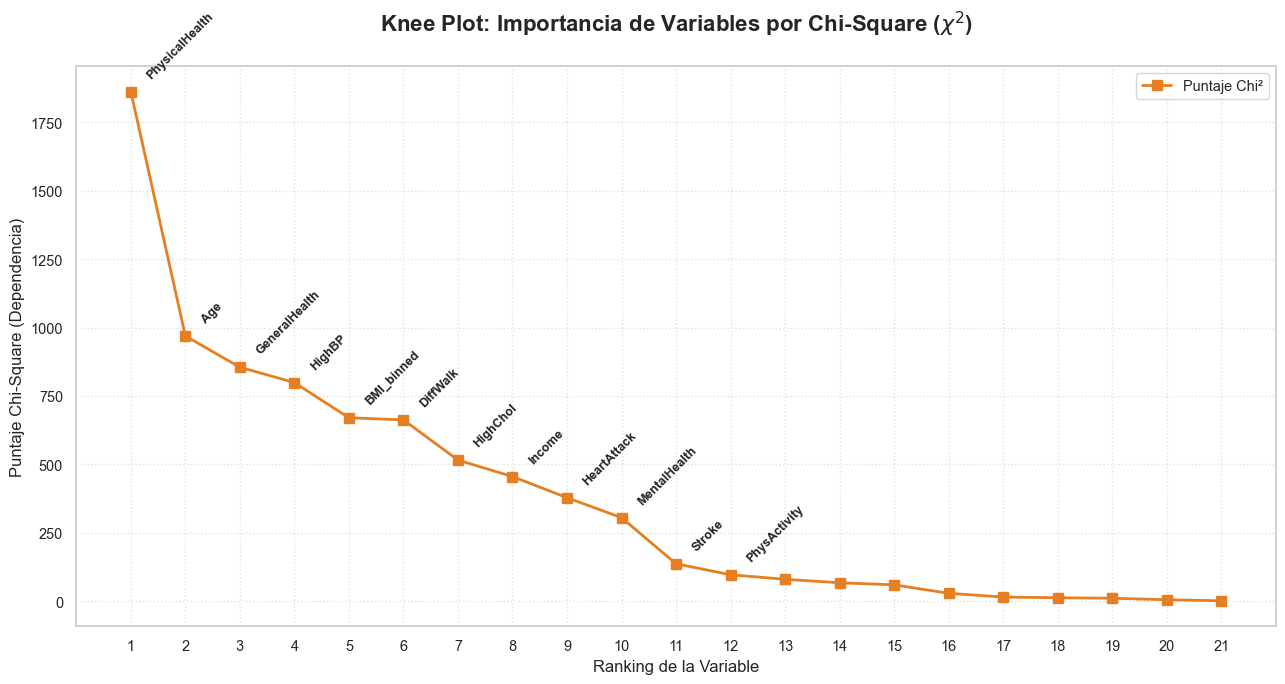

In [75]:
###KNEE PLOT####
# 1. Preparar los datos del ranking (ya están ordenados en tu scores_df)
scores_chi2 = scores_df['Puntaje_Chi2'].values
nombres_vars = scores_df['Variable'].values
rankings = range(1, len(scores_chi2) + 1)

# 2. Crear la figura
plt.figure(figsize=(13, 7))

# Dibujar la línea de codo
plt.plot(rankings, scores_chi2, marker='s', linestyle='-', color='#e67e22', 
         linewidth=2, markersize=7, label='Puntaje Chi²')

# 3. Etiquetar las variables más importantes para identificarlas rápido
for i, txt in enumerate(nombres_vars[:12]): # Etiquetamos las primeras 12
    plt.annotate(txt, (rankings[i], scores_chi2[i]), 
                 xytext=(10, 10), textcoords='offset points', 
                 fontsize=9, fontweight='bold', rotation=45)
    

# 4. Configuración estética
plt.title("Knee Plot: Importancia de Variables por Chi-Square ($\chi^2$)", fontsize=16, weight='bold', pad=25)
plt.xlabel("Ranking de la Variable", fontsize=12)
plt.ylabel("Puntaje Chi-Square (Dependencia)", fontsize=12)
plt.xticks(rankings) # Muestra todos los números del 1 al 21
plt.grid(axis='both', linestyle=':', alpha=0.6)
plt.legend()

# 5. Líneas verticales de corte sugeridas
plt.axvline(x=4.5, color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(x=10.5, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Etiquetas de los cortes
plt.text(4.5 + 0.25, max(scores_chi2)*0.95, '4',
         color='red', fontsize=14, fontweight='bold',
         ha='left', va='top')

plt.text(10.5 + 0.25, max(scores_chi2)*0.95, '10',
         color='red', fontsize=14, fontweight='bold',
         ha='left', va='top')

# Añadir una zona de "corte" sugerida si se ve un cambio brusco
plt.tight_layout()
plt.show()

We generated a **Knee-plot** based on the $\chi^2$ scores to determine the optimal cutoff point for our feature subset. 

By analyzing the "elbow" of the curve, two potential cutoff points were identified:
* **Top 5 variables**: A more parsimonious model focusing on the most influential predictors.
* **Top 11 variables**: A broader subset that captures additional information before the scores plateau.



**Mutual Information** measures the dependency between variables by quantifying how much information is shared between a feature and the target. Unlike $\chi^2$, it captures both **linear and non-linear relationships**.

For this analysis:
* **Continuous Data:** We use the raw `BMI` values instead of the binned version to preserve full information granularity.
* **Discrete Handling:** We explicitly define categorical features for the algorithm to ensure accurate entropy estimation.



Importancia de variables por Mutual Information:


,Variable,MI_Score
14,GeneralHealth,0.086344
0,HighBP,0.074719
20,BMI,0.052341
17,Age,0.047844
1,HighChol,0.043731
12,DiffWalk,0.036032
16,PhysicalHealth,0.025478
19,Income,0.025322
5,HeartAttack,0.018299
6,PhysActivity,0.013575


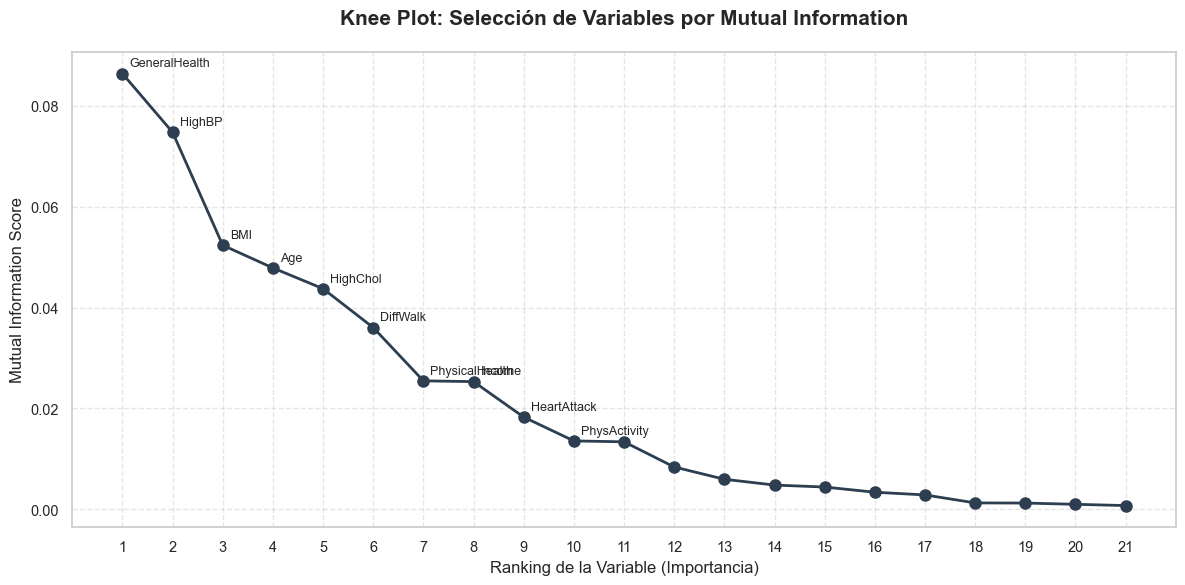

In [76]:
from sklearn.feature_selection import mutual_info_classif

# 1. Definimos las variables (Usamos BMI original para no perder info)
features_mi = list(categorical_vars) + list(ordinal_vars) + ['BMI']
X_mi = df[features_mi].copy()

# 2. Creamos la máscara de variables discretas
# Queremos que sea True para todas EXCEPTO para 'BMI'
discrete_mask = [col != 'BMI' for col in features_mi]
mi_scores = mutual_info_classif(X_mi, df[TARGET_COL], discrete_features=discrete_mask, random_state=42)

# 4. Resultados
mi_results = pd.DataFrame({
    'Variable': features_mi,
    'MI_Score': mi_scores
}).sort_values(by='MI_Score', ascending=False)

print("Importancia de variables por Mutual Information:")
display(mi_results)

#PINTAMOS KNEE-PLOT PARA VER SI PODEMOS ENCONTRAR EL PUNTO DE CORTE VISUALMENTE
# 1. Preparamos los datos (mi_results ya está ordenado de mayor a menor)
scores = mi_results['MI_Score'].values
variables = mi_results['Variable'].values
ranks = range(1, len(scores) + 1)

# 2. Creamos la figura
plt.figure(figsize=(12, 6))

# Pintamos la línea y los puntos
plt.plot(ranks, scores, marker='o', linestyle='-', color='#2c3e50', linewidth=2, markersize=8)

# 3. Añadimos etiquetas de los nombres de las variables (solo las primeras para no saturar)
# Esto ayuda a ver "quién" se queda fuera del corte
for i, txt in enumerate(variables[:10]): # Etiquetamos las 10 primeras
    plt.annotate(txt, (ranks[i], scores[i]), xytext=(5, 5), textcoords='offset points', fontsize=9)

# 4. Formato estético
plt.title("Knee Plot: Selección de Variables por Mutual Information", fontsize=15, weight='bold', pad=20)
plt.xlabel("Ranking de la Variable (Importancia)", fontsize=12)
plt.ylabel("Mutual Information Score", fontsize=12)
plt.xticks(ranks) # Que se vean todos los números de ranking
plt.grid(axis='both', linestyle='--', alpha=0.5)

# 5. Líneas verticales de corte sugeridas
plt.axvline(x=6.5, color='red', linestyle='--', linewidth=2, alpha=0.8)
plt.axvline(x=11.5, color='red', linestyle='--', linewidth=2, alpha=0.8)

# Etiquetas de los cortes
plt.text(6.5 + 0.25, max(scores)*0.95, '6',
         color='red', fontsize=14, fontweight='bold',
         ha='center', va='top')

plt.text(11.5 + 0.25, max(scores)*0.95, '11',
         color='red', fontsize=14, fontweight='bold',
         ha='center', va='top')


plt.tight_layout()
plt.show()

The **Knee-plot** analysis for Mutual Information reveals two potential **elbow points** for feature selection.

* **Subset A (Top 7 features):** A high-efficiency selection focusing on the strongest predictors.
* **Subset B (Top 10 features):** A more inclusive set to capture secondary dependencies.

**Next Step:** We will evaluate both subsets across our models to determine which configuration optimizes the trade-off between model complexity and predictive accuracy.



To refine our selection, we implemented the **mRMR algorithm**, which optimizes the feature set based on two competing criteria:
1.  **Maximum Relevance:** Features must have high predictive power regarding the target (**Diabetes**).
2.  **Minimum Redundancy:** Features should be as independent from each other as possible.

This approach ensures that each selected variable provides **unique information**, preventing the model from being biased by highly correlated predictors.




In [ ]:
#Este algoritmo de nuevo acepta variables continuas, usamos el mismo dataframe que para Mutual Information
from mrmr import mrmr_classif

selected_features = mrmr_classif(X=X_mi, y=df[TARGET_COL], K=21) #cambiar pongo 21 para verlas todas en orden

# 3. Mostrar el resultado

print("### MEJOR SUBSET SELECCIONADO (mRMR) ###")
print(selected_features)


##### Observations:
* **Consistency:** The results are largely consistent with previous methods; the features at the bottom of the ranking remain virtually identical across all three algorithms.
* **Low Inter-correlation:** The impact of redundancy is subtle here because the dataset lacks highly collinear variables (the strongest correlation is **Physical Health** at ~0.5).
* **Success with Rare Events:** Notably, **CholCheck** now ranks higher. This confirms that mRMR recognizes its **unique informational value**, even if it appears in few observations, as it is not redundant with other predictors.

In [78]:
# Lista de columnas que quieres conservar
columnas_a_conservar = [
    'GeneralHealth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 
    'Income', 'CholCheck', 'HeartAttack', 'PhysicalHealth', 'Heavy_drinking',
    'PhysActivity', 'Education', 'Stroke', 'Smoker', 'Veggies', 
    'MentalHealth', 'HealthCare', 'Fruits', 'Sex', 'Unaffordable_care'
]

# Filtrar las columnas en train_final y test_final
train_final = train_final[columnas_a_conservar]
test_final = test_final[columnas_a_conservar]

## LOGISTIC REGRESSION MODEL

In [79]:
# Librerías necesarias
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [80]:
import numpy as np
import pandas as pd

# df = pd.read_csv("../data/diabetes_train.csv")
# df.head(5)

df_train = train_final.copy()
print(df_train.columns)

Index(['GeneralHealth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk',
       'Income', 'CholCheck', 'HeartAttack', 'PhysicalHealth',
       'Heavy_drinking', 'PhysActivity', 'Education', 'Stroke', 'Smoker',
       'Veggies', 'MentalHealth', 'HealthCare', 'Fruits', 'Sex',
       'Unaffordable_care'],
      dtype='object')


In [93]:
df['Diabetes'] = df['Diabetes'].map({0: 0, 1: 1, 2: 1})

# # Target binaria (ejemplo: Diabetes vs No)
y = df["Diabetes"]

# # Variables explicativas
# X = df.drop(columns=["Diabetes"])

X = df_train.copy()

In [94]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [95]:
num_cols = X.select_dtypes(include=["int64", "float64"]).columns

scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

In [96]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Listas para almacenar métricas de cada fold
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []
roc_auc_list = []

In [101]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1, 5, 10],
    'solver': ['liblinear']  # 'liblinear' permite L1 y L2
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000, random_state=42),
    param_grid,
    cv=10,          # K-Fold interno
    scoring='roc_auc',
    n_jobs=-1
)

grid.fit(X, y)

print("Mejores parámetros:", grid.best_params_)
print("Mejor AUC:", grid.best_score_)


Mejores parámetros: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
Mejor AUC: 0.8164492799999999


In [102]:
model = LogisticRegression(
penalty='l2',           # Tipo de regularización ('l1', 'l2', 'elasticnet', 'none')
C=0.01,                  # Fuerza de regularización (menor = más regularización)
solver='liblinear',         # Algoritmo para optimizar
class_weight=None,      # 'balanced' si hay clases desbalanceadas
max_iter=1000,          # Iteraciones máximas para converger
random_state=42     # 'ovr' para binaria, 'multinomial' si tu target fuera multiclase
)

In [103]:
for train_index, val_index in kf.split(X, y):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
      
    model.fit(X_train, y_train)

    # Predicciones
    y_pred = model.predict(X_val)
    y_prob = model.predict_proba(X_val)[:, 1]  # Probabilidad de clase positiva


    # Métricas
    accuracy_list.append(accuracy_score(y_val, y_pred))
    precision_list.append(precision_score(y_val, y_pred, pos_label=1))
    recall_list.append(recall_score(y_val, y_pred, pos_label=1))
    f1_list.append(f1_score(y_val, y_pred, pos_label=1))
    roc_auc_list.append(roc_auc_score(y_val, y_prob))


In [104]:
import pandas as pd

coef_diff = pd.DataFrame({
    'Feature': X.columns,
    'Coefficients': model.coef_[0],
})

print(coef_diff)

              Feature  Coefficients
0       GeneralHealth      0.538133
1              HighBP      0.357897
2                 BMI      0.459876
3                 Age      0.400942
4            HighChol      0.301112
5            DiffWalk      0.011996
6              Income     -0.122732
7           CholCheck      0.209392
8         HeartAttack      0.058276
9      PhysicalHealth      0.005060
10     Heavy_drinking     -0.138182
11       PhysActivity     -0.056273
12          Education     -0.024480
13             Stroke      0.028872
14             Smoker      0.011655
15            Veggies     -0.002721
16       MentalHealth     -0.026707
17         HealthCare      0.055231
18             Fruits     -0.021039
19                Sex      0.110327
20  Unaffordable_care      0.075271


In [105]:
print("CV Results (10 folds):")
print(f"Accuracy: {np.mean(accuracy_list):.3f}")
print(f"Precision: {np.mean(precision_list):.3f}")
print(f"Recall: {np.mean(recall_list):.3f}")
print(f"F1-score: {np.mean(f1_list):.3f}")
print(f"ROC-AUC: {np.mean(roc_auc_list):.3f}")

CV Results (10 folds):
Accuracy: 0.741
Precision: 0.733
Recall: 0.760
F1-score: 0.746
ROC-AUC: 0.816


C:\Users\julia\AppData\Local\Temp\ipykernel_21220\715231721.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


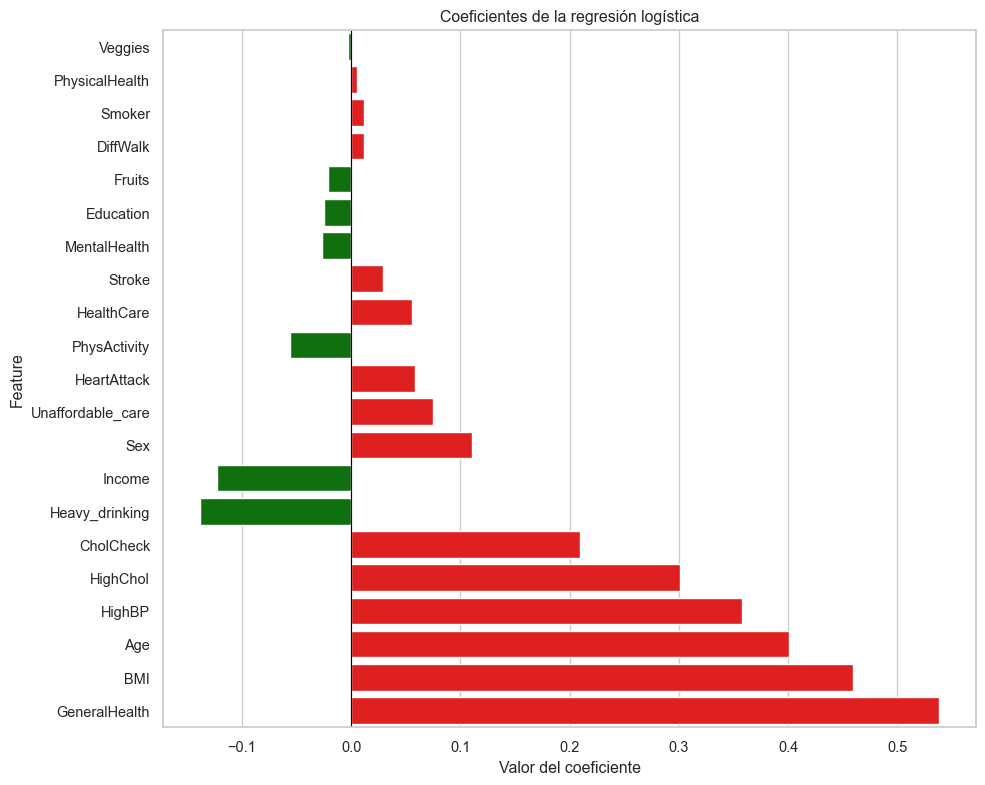

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Tus coeficientes como DataFrame
coef_df = pd.DataFrame({
    'Feature': [
        'GeneralHealth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk',
        'Income', 'CholCheck', 'HeartAttack', 'PhysicalHealth', 'Heavy_drinking',
        'PhysActivity', 'Education', 'Stroke', 'Smoker', 'Veggies',
        'MentalHealth', 'HealthCare', 'Fruits', 'Sex', 'Unaffordable_care'
    ],
    'Coefficients': [
        0.538133, 0.357897, 0.459876, 0.400942, 0.301112, 0.011996,
        -0.122732, 0.209392, 0.058276, 0.005060, -0.138182,
        -0.056273, -0.024480, 0.028872, 0.011655, -0.002721,
        -0.026707, 0.055231, -0.021039, 0.110327, 0.075271
    ]
})

# Ordenar por valor absoluto de coeficiente
coef_df['abs_coef'] = coef_df['Coefficients'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=True)

# Crear un diccionario de colores
color_dict = {row['Feature']: ('green' if row['Coefficients'] < 0 else 'red') 
              for _, row in coef_df.iterrows()}

# Gráfico de barras horizontales
plt.figure(figsize=(10,8))
sns.barplot(
    x='Coefficients', 
    y='Feature', 
    data=coef_df,
    palette=color_dict
)
plt.axvline(0, color='black', linewidth=0.8)  # Línea en 0
plt.title('Coeficientes de la regresión logística')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


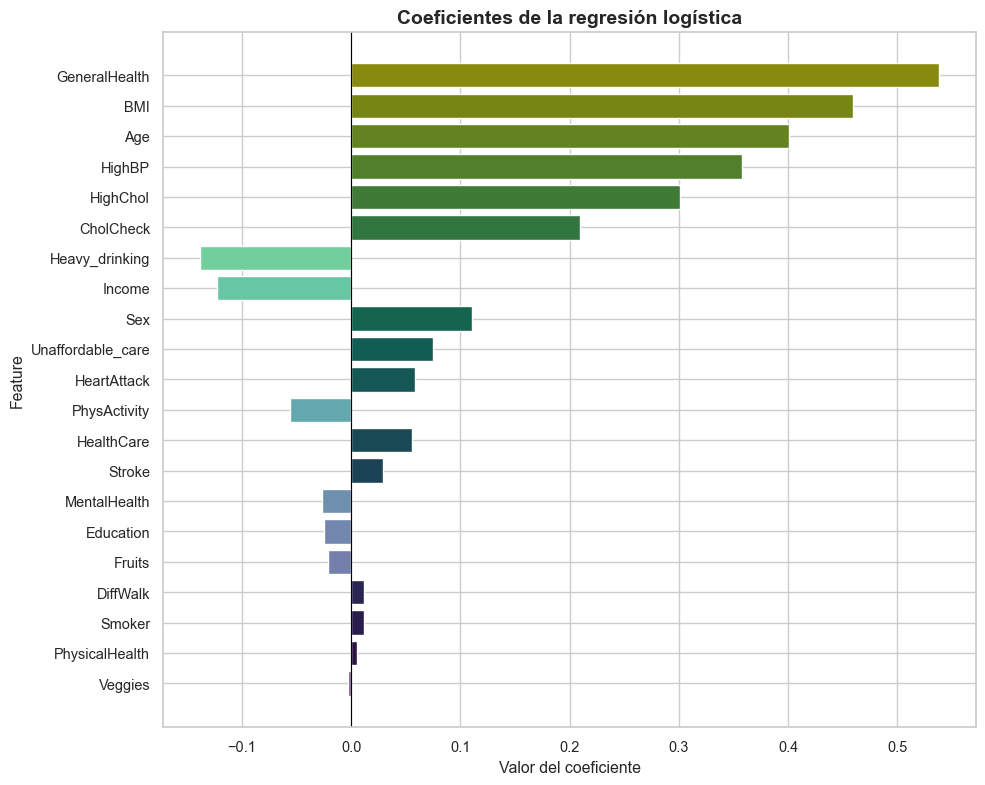

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Tus coeficientes como DataFrame
coef_df = pd.DataFrame({
    'Feature': [
        'GeneralHealth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk',
        'Income', 'CholCheck', 'HeartAttack', 'PhysicalHealth', 'Heavy_drinking',
        'PhysActivity', 'Education', 'Stroke', 'Smoker', 'Veggies',
        'MentalHealth', 'HealthCare', 'Fruits', 'Sex', 'Unaffordable_care'
    ],
    'Coefficients': [
        0.538133, 0.357897, 0.459876, 0.400942, 0.301112, 0.011996,
        -0.122732, 0.209392, 0.058276, 0.005060, -0.138182,
        -0.056273, -0.024480, 0.028872, 0.011655, -0.002721,
        -0.026707, 0.055231, -0.021039, 0.110327, 0.075271
    ]
})

# Ordenar por valor absoluto de coeficiente
coef_df['abs_coef'] = coef_df['Coefficients'].abs()
coef_df = coef_df.sort_values(by='abs_coef', ascending=True)

# Crear una paleta base tipo "viridis" (verde-azulado)
base_colors = sns.color_palette("viridis", n_colors=len(coef_df))

# Generar colores claros para negativos y oscuros para positivos
colors = []
for coef, base in zip(coef_df['Coefficients'], base_colors):
    base = np.array(base)
    if coef < 0:
        # tono claro para negativos
        color = (base + 0.4) / 1.4
    else:
        # tono oscuro para positivos
        color = base * 0.6
    colors.append(color)

# Gráfico de barras horizontales
plt.figure(figsize=(10,8))
plt.barh(coef_df['Feature'], coef_df['Coefficients'], color=colors)
plt.axvline(0, color='black', linewidth=0.8)  # Línea en 0
plt.title('Coeficientes de la regresión logística', fontsize=14, weight='bold')
plt.xlabel('Valor del coeficiente')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## XGBoost

In [ ]:
# 1. Visualizamos el efecto del learning rate y cuantas iteraciones necesitamos (usamos solo entrenamiento)

X_cv = df_train.drop(columns=[TARGET_COL])
y_cv = df_train[TARGET_COL].replace({2: 1}) # XGBoost requiere 0 y 1 (como la clase diabetico es 2)

# 2. Configuración de parámetros
num_features = X_cv.shape[1]
colsample_bynode = np.sqrt(num_features) / num_features # Simula sqrt típico usado en Random Forest
learning_rates = [0.005,0.01,0.02, 0.05,0.1] #distintos números a probar
n_estimators_max = 500  # Máximo de árboles a probar

plt.figure(figsize=(10, 6))

# Convertimos a DMatrix una sola vez para máxima velocidad
dtrain = xgb.DMatrix(X_cv, label=y_cv)

for lr in learning_rates:
    print(f"Calculando validación cruzada para learning_rate={lr}...")
    
    params = {
        'max_depth': 3, #he probado tb con 3 
        'learning_rate': lr,
        'subsample': 0.9,
        'colsample_bynode': colsample_bynode,
        'objective': 'binary:logistic',
        'eval_metric': 'error', # Error = 1 - Accuracy
        'nthread': -1
    }
    
    # Ejecutamos la Validación Cruzada (K-Fold)
    cv_history = xgb.cv(
        params=params,
        dtrain=dtrain,
        num_boost_round=n_estimators_max,
        nfold=5,             # 5-Fold CV
        stratified=True,
        as_pandas=True,
        seed=42
    )
    
    # Convertimos el error medio de los folds a Accuracy
    acc_cv = 1 - cv_history['test-error-mean']
    
    # Graficamos la curva para este learning rate
    plt.plot(range(1, len(acc_cv) + 1), acc_cv, label=f'learning_rate={lr}')

# 3. Formato del gráfico
plt.xlabel('Número de árboles (n_estimators)')
plt.ylabel('Accuracy (Promedio 5-Fold CV)')
plt.title('XGBoost - Evolución de Accuracy por Learning Rate (Sin Leakage)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The model tends to **overfit** very quickly. This is evident in the learning curves with the highest learning rates, where accuracy peaks rapidly and then progressively declines as the model continues to train. 

To address this, I have designed a **Hyperparameter Grid** using estimated ranges to control complexity, incorporating fine-tuned **L1 and L2 regularization** terms (see below all descriptions). We will perform a **Randomized Search** to ensure computational efficiency. While this method might not find the absolute **global optimum**, the resulting models are expected to be highly similar, and the primary focus of this study remains **model interpretability** rather than marginal performance gains.

XGBoost Hyperparameter Definitions

* **`n_estimators`**: Total number of trees in the model. Increasing this improves generalization and convergence; once a sufficient number is reached, adding more increases computation but prevents overfitting.
* **`learning_rate` ($\eta$)**: Scales the contribution of each tree to prevent early overfitting. Smaller values produce more generalizable models but require more estimators to reach optimal performance.
 **`subsample` & **`colsample_bynode`**: These define the fraction of samples and features used for each tree/node. These techniques reduce tree correlation, improving the ensemble's robustness. We will use a $\sqrt{n}$ approach for feature sampling, a standard practice in Random Forests.
* **`min_child_weight`**: Similar to `min_samples_split` but based on the sum of instance weights in a leaf. It prevents the model from creating nodes that represent too few data points.
* **`gamma` ($\gamma$ / `min_split_loss`)**: Acts as a minimum gain threshold required to allow a further split. It serves as a cost-complexity pruning parameter to penalize tree depth.
* **`reg_lambda` ($\lambda$)**: **L2 regularization** (Ridge). It smooths leaf weights by penalizing their squares, resulting in a more conservative and stable model that avoids extreme corrections.
* **`reg_alpha` ($\alpha$)**: **L1 regularization** (Lasso). It can reduce leaf contributions to exactly zero, performing a stricter feature selection by eliminating redundant rules and leaves.

In [ ]:
# Definimos el espacio de búsqueda
param_dist = {
    # 1. Parámetros de Estructura (Controlan complejidad)
    'max_depth': [3, 5, 8],            # Evitamos ir a >10 por el tamaño del dataset
    'min_child_weight': [5, 10, 20],      # Cuanto más alto, más conservador (ideal para ese 2.5% raro)
    
    # 2. Parámetros de Robustez (Aleatoriedad para evitar memorización)
    'subsample': [0.8, 0.9],
    'colsample_bynode': [colsample_bynode,0.5,0.8],
    
    # 3. Parámetros de Regularización (Los "frenos" del modelo)
    'gamma': [0, 0.1, 0.2],  # Penaliza la creación de nuevos nodos
    'reg_alpha': [0, 0.1, 0.5],      # L1 (Lasso) - puede eliminar variables poco útiles
    'reg_lambda': [0.5, 1, 2],        # L2 (Ridge) - suaviza los pesos de las variables
    
    # 4. Velocidad de aprendizaje y cantidad de árboles
    'learning_rate': [0.01, 0.02, 0.05, 0.1],
    'n_estimators': [100, 500, 800]
}

# Configuramos el buscador
xgb_model = XGBClassifier(objective='binary:logistic', random_state=42, n_jobs=-1)

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=200,           # Prueba 50 combinaciones aleatorias (puedes subirlo a 100 si tienes tiempo)
    scoring='f1',        # O 'roc_auc' para maximizar la capacidad de distinción
    cv=5,                # 5-Fold Cross Validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Ejecutamos la búsqueda (usando solo el set de entrenamiento)
random_search.fit(X_cv, y_cv)

print(f"Mejores parámetros encontrados: {random_search.best_params_}")
print(f"Mejor score de CV (F1): {random_search.best_score_:.4f}")

Fitting 5 folds for each of 200 candidates, totalling 1000 fits
Mejores parámetros encontrados: {'subsample': 0.9, 'reg_lambda': 1, 'reg_alpha': 0.5, 'n_estimators': 500, 'min_child_weight': 10, 'max_depth': 3, 'learning_rate': 0.02, 'gamma': 0.2, 'colsample_bynode': np.float64(0.21821789023599236)}
Mejor score de CV (F1): 0.7541


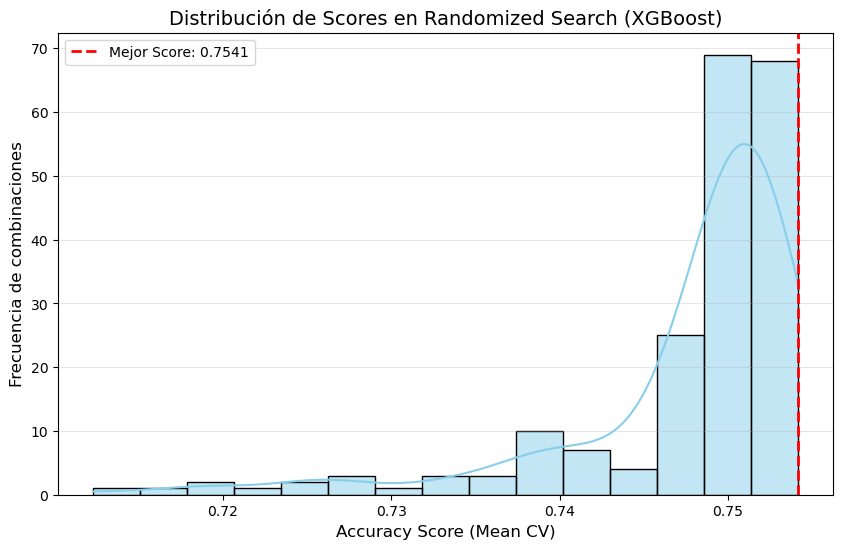

In [ ]:
# --- VISUALIZACIÓN DE RESULTADOS ---

# Extraemos todos los scores medios de las 50 iteraciones
scores = random_search.cv_results_['mean_test_score']
best_score = random_search.best_score_

plt.figure(figsize=(10, 6))

# Creamos el histograma con la curva KDE
sns.histplot(scores, kde=True, color="skyblue", bins=15)

# Añadimos una línea vertical para el mejor resultado
plt.axvline(best_score, color='red', linestyle='--', linewidth=2, 
            label=f'Mejor Score: {best_score:.4f}')

plt.title(f'Distribución de Scores en Randomized Search (XGBoost)', fontsize=14)
plt.xlabel('Accuracy Score (Mean CV)', fontsize=12)
plt.ylabel('Frecuencia de combinaciones', fontsize=12)
plt.legend()
plt.grid(axis='y', alpha=0.3)
plt.show()

The distribution of scores from the **Randomized Search** reveals a clear dependency between specific hyperparameter combinations and model performance:

* **Performance Concentration:** The majority of combinations are clustered near the maximum accuracy obtained, suggesting a stable region of high performance.
* **Distribution Shape:** The distribution exhibits a **long left tail**, indicating that a small subset of hyperparameter configurations leads to significantly lower accuracy.
* **Interpretation:** This confirms that while the model is robust, proper tuning is essential to avoid suboptimal configurations in the "tail" of the distribution.

--- REPORTE DE CLASIFICACIÓN FINAL (SET DE TEST) ---
              precision    recall  f1-score   support

           0      0.946     0.704     0.807     42741
           1      0.331     0.786     0.466      7995

    accuracy                          0.716     50736
   macro avg      0.639     0.745     0.637     50736
weighted avg      0.849     0.716     0.753     50736



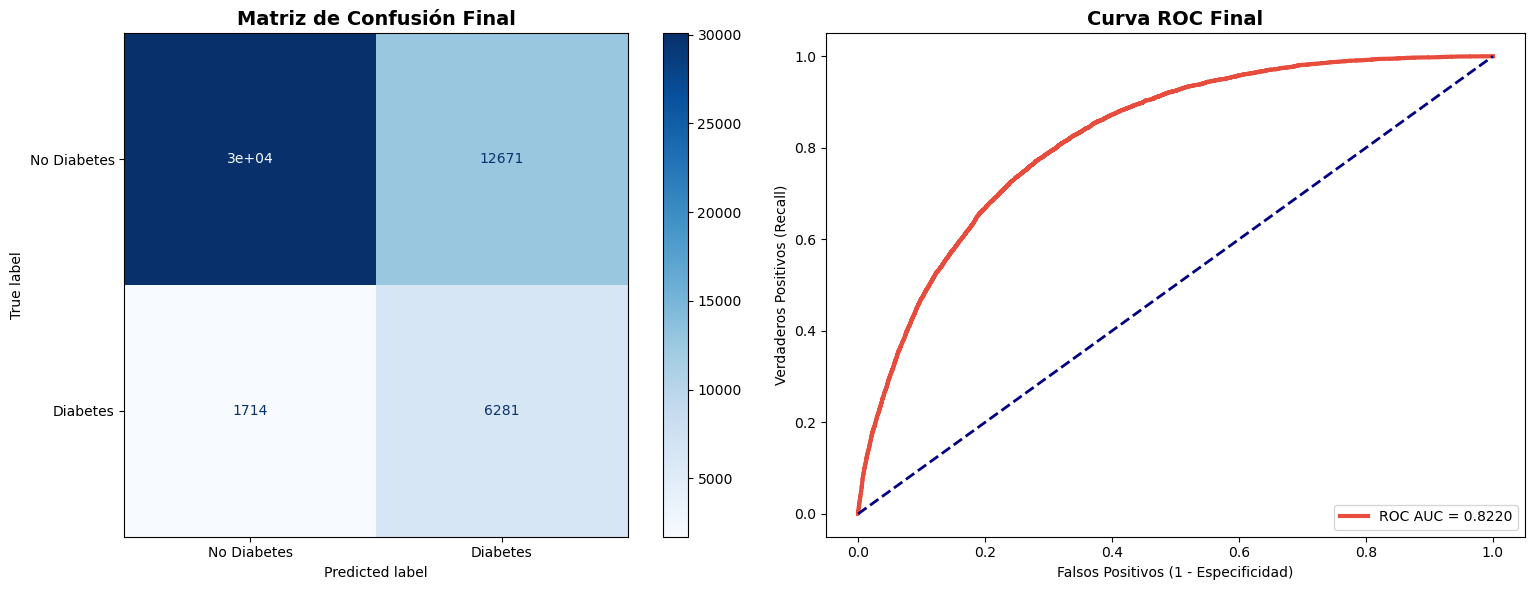

Área bajo la curva ROC (AUC): 0.8220


In [ ]:
# 1. Extraer el mejor modelo del RandomizedSearch
best_xgb = random_search.best_estimator_

X_test = df_test.drop(columns=[TARGET_COL])
y_test = df_test[TARGET_COL].replace({2: 1}) # XGBoost requiere 0 y 1 (como la clase diabetico es 2)

# 2. Realizar predicciones sobre el conjunto de TEST (el que no ha visto nunca)
y_pred = best_xgb.predict(X_test)
y_prob = best_xgb.predict_proba(X_test)[:, 1] # Probabilidades para la curva ROC

# 3. Mostrar el reporte de clasificación detallado
print("--- REPORTE DE CLASIFICACIÓN FINAL (SET DE TEST) ---")
print(classification_report(y_test, y_pred,digits=3))

# 4. Crear visualizaciones: Matriz de Confusión y Curva ROC
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# A. Matriz de Confusión
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=['No Diabetes', 'Diabetes'], 
    cmap='Blues', 
    ax=ax[0]
)
ax[0].set_title('Matriz de Confusión Final', fontsize=14, weight='bold')

# B. Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
ax[1].plot(fpr, tpr, color='#e74c3c', lw=3, label=f'ROC AUC = {roc_auc:.4f}')
ax[1].plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax[1].set_title('Curva ROC Final', fontsize=14, weight='bold')
ax[1].set_xlabel('Falsos Positivos (1 - Especificidad)')
ax[1].set_ylabel('Verdaderos Positivos (Recall)')
ax[1].legend(loc="lower right")

plt.tight_layout()
plt.show()

print(f"Área bajo la curva ROC (AUC): {roc_auc_score(y_test, y_prob):.4f}")


The results from our best hyperparameter combination are highly favorable from a medical and preventive standpoint:

* **High Sensitivity (Recall):** The model correctly identifies **79% of diabetic patients**. This high sensitivity is crucial for early intervention.
* **Reliability of Negative Predictions:** The model shows a **95% Negative Predictive Value (NPV)**; when it predicts a patient is not diabetic, it is correct in the vast majority of cases.
* **Precision Trade-off:** The precision for the positive class is approximately **0.33**, meaning only 1 out of 3 positive predictions is a true diabetic case.

**Conclusion:** While positive predictions require confirmation via clinical blood tests due to the false positive rate, the model serves as an excellent **screening tool**. It prioritizes capturing potential cases (prevention) over extreme precision, which is the preferred strategy in medical diagnostics.

XGBoost includes an **embedded feature selection** mechanism that ranks variables based on their contribution during the construction of the boosted trees. This ranking is primarily based on three metrics:

1.  **Gain (Weight):** The average reduction in the loss function (or increase in information) brought by a feature when it is used for a split. This is the most significant metric for understanding a feature's predictive power.
2.  **Cover:** The relative number of observations related to a feature. It measures how many samples are affected by the splits made on a specific variable.
3.  **Frequency (Weight):** The number of times a feature is used across all generated trees.


C:\Users\usuario\AppData\Local\Temp\ipykernel_12916\3681731512.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


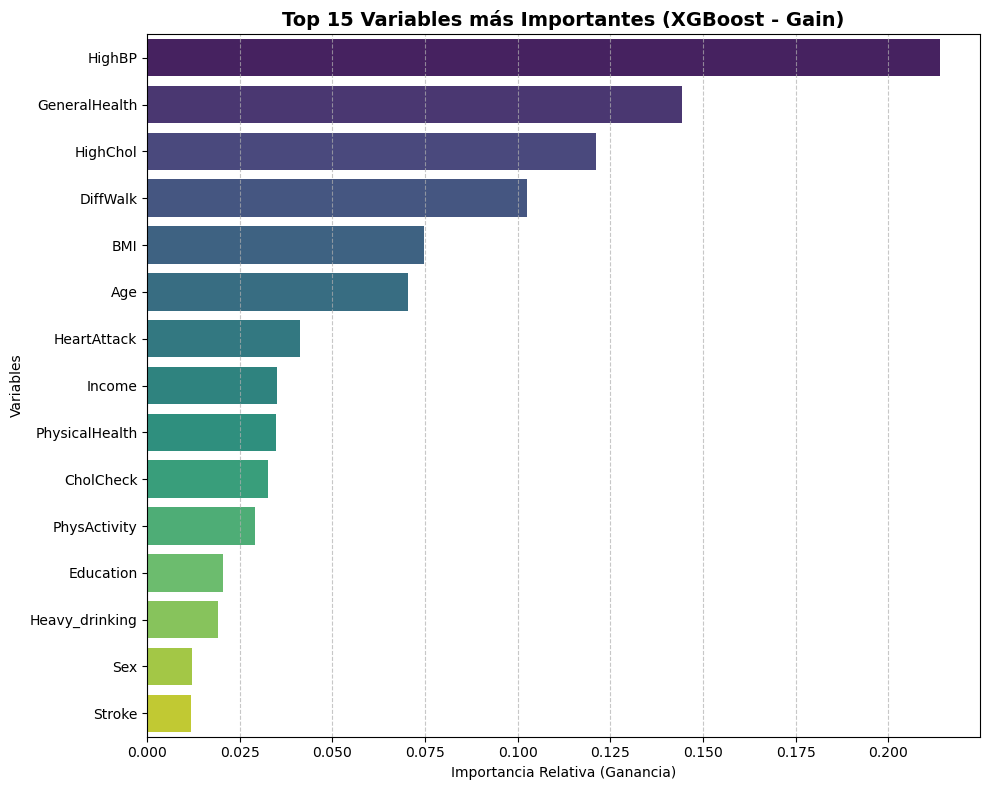

          Variable  Importancia
1           HighBP     0.213989
15   GeneralHealth     0.144252
2         HighChol     0.121153
13        DiffWalk     0.102501
0              BMI     0.074631
18             Age     0.070295
6      HeartAttack     0.041188
20          Income     0.035082
17  PhysicalHealth     0.034768
3        CholCheck     0.032576
7     PhysActivity     0.029018
19       Education     0.020411
10  Heavy_drinking     0.019240
14             Sex     0.012035
5           Stroke     0.011825


In [ ]:
# 1. Extraer las importancias (Gain)
# 'best_xgb' es el modelo que salió de tu RandomizedSearchCV
importances = best_xgb.feature_importances_
feature_names = X_cv.columns

# 2. Crear un DataFrame para facilitar el manejo
feature_importance_df = pd.DataFrame({
    'Variable': feature_names,
    'Importancia': importances
}).sort_values(by='Importancia', ascending=False)

# 3. Graficar
plt.figure(figsize=(10, 8))
sns.barplot(
    x='Importancia', 
    y='Variable', 
    data=feature_importance_df.head(15), # Mostramos las 15 mejores
    palette='viridis'
)

plt.title('Top 15 Variables más Importantes (XGBoost - Gain)', fontsize=14, weight='bold')
plt.xlabel('Importancia Relativa (Ganancia)')
plt.ylabel('Variables')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Wrapper feature subset selection
Using the optimized hyperparameter configuration (the "winning combination"), we implement a **Wrapper-based feature selection** method. Specifically, we use **RFECV**, which performs a backward elimination process. We use **Accuracy** as the optimization metric, this is a valid approach here because the selection is performed on a **balanced training set**, ensuring that the metric is not biased towards the majority class.

Iniciando búsqueda del subset óptimo (esto puede tardar)...
Número óptimo de variables: 18
Variables seleccionadas: ['BMI', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartAttack', 'PhysActivity', 'Heavy_drinking', 'HealthCare', 'Unaffordable_care', 'DiffWalk', 'Sex', 'GeneralHealth', 'PhysicalHealth', 'Age', 'Education', 'Income']


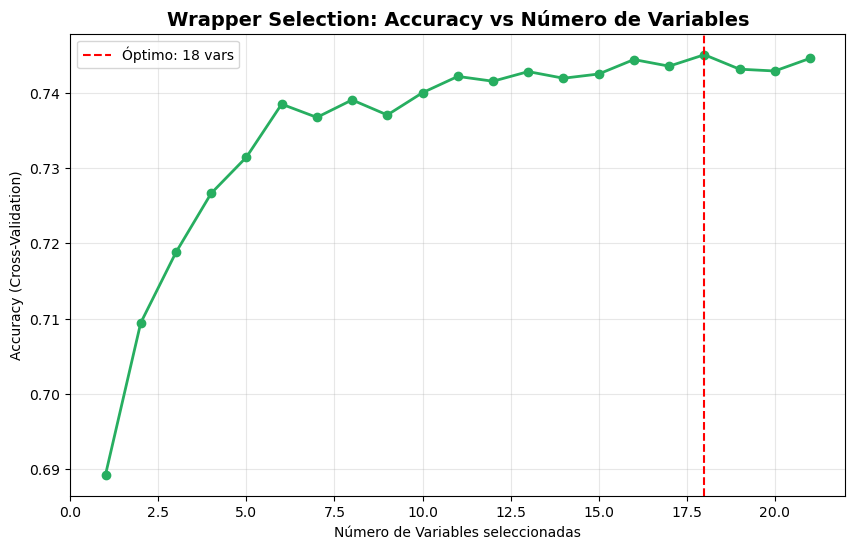

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold


# 1. Instanciamos el modelo que servirá de "motor" para la selección
# Usamos parámetros básicos para que no tarde una eternidad
clf_ganador = random_search.best_estimator_

# 2. Configuramos el Wrapper (RFECV)
# min_features_to_select: El mínimo de variables que queremos
# step: Cuántas variables elimina en cada iteración (1 es lo más preciso)
# cv: 5 folds para que el resultado sea robusto
rfecv = RFECV(
    estimator=clf_ganador, 
    step=1, 
    cv=StratifiedKFold(5), 
    scoring='accuracy', 
    min_features_to_select=1,
    n_jobs=-1
)

# 3. Ajustamos el Wrapper a los datos de entrenamiento
print("Iniciando búsqueda del subset óptimo (esto puede tardar)...")
rfecv.fit(X_cv, y_cv)

# 4. Resultados
print(f"Número óptimo de variables: {rfecv.n_features_}")
variables_wrapper = X_cv.columns[rfecv.support_].tolist()
print(f"Variables seleccionadas: {variables_wrapper}")

# 5. Graficamos la curva de rendimiento vs número de variables
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'], 
         marker='o', color='#27ae60', linewidth=2)
plt.title("Wrapper Selection: Accuracy vs Número de Variables", fontsize=14, weight='bold')
plt.xlabel("Número de Variables seleccionadas")
plt.ylabel("Accuracy (Cross-Validation)")
plt.axvline(x=rfecv.n_features_, color='red', linestyle='--', label=f'Óptimo: {rfecv.n_features_} vars')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

To determine the most effective feature selection strategy, we evaluated the optimized XGBoost model on the **Test Set** using each subset identified by our previous methods. 
This comparison allows us to observe the trade-off between **model parsimony** (fewer variables) and **predictive power** on unseen data. 

In [ ]:
from sklearn.metrics import recall_score, precision_score, f1_score, roc_auc_score, classification_report

# 1. Definimos el diccionario con todas tus configuraciones
configuraciones = {
    'CFS': ['GeneralHealth', 'HighBP', 'BMI', 'Age', 'HighChol', 'DiffWalk', 'Income', 'CholCheck', 'HeartAttack', 'PhysicalHealth', 'Heavy_drinking'],
    'Chi2_Reducido': ['PhysicalHealth', 'Age', 'GeneralHealth', 'HighBP', 'BMI'],
    'Chi2_Extendido': ['PhysicalHealth', 'Age', 'GeneralHealth', 'HighBP', 'BMI', 'DiffWalk', 'HighChol', 'Income', 'HeartAttack', 'MentalHealth'],
    'MI_Reducido': ['GeneralHealth', 'Age', 'HighBP', 'BMI', 'HighChol', 'DiffWalk', 'PhysicalHealth'],
    'MI_Extendido': ['GeneralHealth', 'Age', 'HighBP', 'BMI', 'HighChol', 'DiffWalk', 'PhysicalHealth', 'Income', 'HeartAttack', 'PhysActivity'],
    'Wrapper_RFECV': variables_wrapper # La lista que generamos antes
}

# Lista para guardar los resultados y comparar al final
resultados_lista = []

print("Iniciando evaluación comparativa...\n")

# 2. El Bucle de Evaluación
for nombre, lista_vars in configuraciones.items():
    print(f"Evaluando método: {nombre} ({len(lista_vars)} variables)...")
    
    # Filtrar conjuntos
    X_train_loop = X_cv[lista_vars]
    X_test_loop = X_test[lista_vars]
    
    # Entrenar (usando tu mejor estimador encontrado)
    model = random_search.best_estimator_
    model.fit(X_train_loop, y_cv)
    
    # Predecir
    y_pred = model.predict(X_test_loop)
    y_prob = model.predict_proba(X_test_loop)[:, 1]
    
    # Calcular métricas (especialmente el Recall para la clase 1)
    metrics = {
        'Método': nombre,
        'N_Variables': len(lista_vars),
        'Recall_Diabetes': recall_score(y_test, y_pred),
        'Precision_Diabetes': precision_score(y_test, y_pred),
        'F1_Score': f1_score(y_test, y_pred),
        'AUC_ROC': roc_auc_score(y_test, y_prob)
    }
    resultados_lista.append(metrics)
    
    # Opcional: imprimir el reporte completo para cada uno
    # print(classification_report(y_test, y_pred))

# 3. Crear DataFrame Comparativo Final
df_comparativo = pd.DataFrame(resultados_lista).sort_values(by='Recall_Diabetes', ascending=False)

print("\n" + "="*60)
print("TABLA COMPARATIVA FINAL DE SELECCIÓN DE VARIABLES")
print("="*60)
display(df_comparativo)

Iniciando evaluación comparativa...

Evaluando método: CFS (11 variables)...
Evaluando método: Chi2_Reducido (5 variables)...
Evaluando método: Chi2_Extendido (10 variables)...
Evaluando método: MI_Reducido (7 variables)...
Evaluando método: MI_Extendido (10 variables)...
Evaluando método: Wrapper_RFECV (18 variables)...

TABLA COMPARATIVA FINAL DE SELECCIÓN DE VARIABLES


,Método,N_Variables,Recall_Diabetes,Precision_Diabetes,F1_Score,AUC_ROC
5,Wrapper_RFECV,18,0.785616,0.331539,0.466295,0.821880
4,MI_Extendido,10,0.785241,0.327730,0.462451,0.818079
2,Chi2_Extendido,10,0.784240,0.328375,0.462919,0.818601
0,CFS,11,0.784240,0.330209,0.464737,0.820823
3,MI_Reducido,7,0.781363,0.321116,0.455171,0.814798
1,Chi2_Reducido,5,0.775235,0.320924,0.453933,0.808656


# INTERPRETABILITY (SHAP VALUES)

In [ ]:
# Inicializamos el visualizador de JS (necesario para algunas gráficas interactivas si usas Jupyter)
shap.initjs()
explainer = shap.TreeExplainer(best_xgb)
# Queremos extraer, por ejemplo, 1000 muestras representativas
N_MUESTRAS = 5000 
'''
X_shap, _, y_shap, _ = train_test_split(
    X_test, 
    y_test, 
    train_size=N_MUESTRAS, 
    stratify=y_test,    # <-- Esto es lo que preserva las proporciones
    random_state=42     # Para que si repites el código, te salgan siempre los mismos
)
'''
shap_values = explainer(X_cv)

#Miramos el formato, a veces shap devuelve en formatos que dan problemas para el resto de funciones como dimensión 3
print(type(shap_values))
print(shap_values.shape)

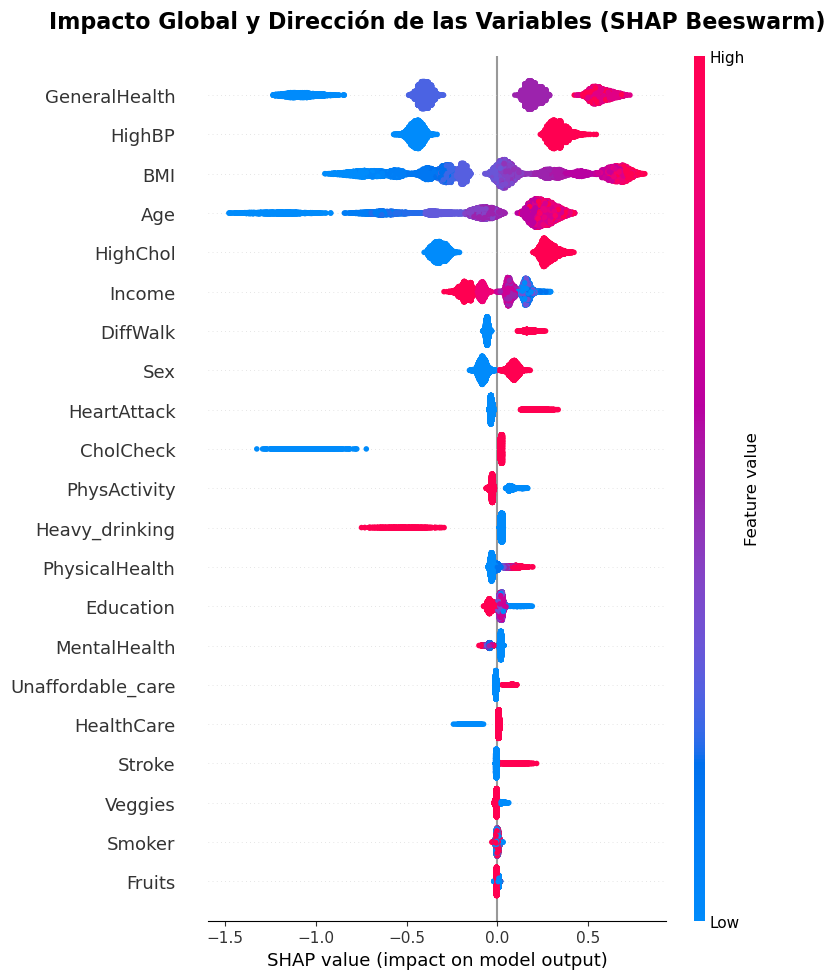

In [ ]:
#Gráfica para ver la importancia global(ordenadas de mayor a menor) y la dirección de impacto de las variables en la probabilidad de ser diabético  
plt.figure(figsize=(10, 12)) 

# 2. Llamamos a beeswarm con show=False para que nos deje editarla
# max_display=21 para que no se deje ninguna variable fuera
shap.plots.beeswarm(shap_values, max_display=21, show=False)

# 3. Ahora sí, añadimos el título y ajustamos
plt.title("Impacto Global y Dirección de las Variables (SHAP Beeswarm)", 
          fontsize=16, 
          weight='bold', 
          pad=20) # 'pad' da un poco de aire entre el título y las variables

# 4. Ajustes finales de layout
plt.tight_layout()

# 5. Finalmente, mostramos la gráfica completa
plt.show()

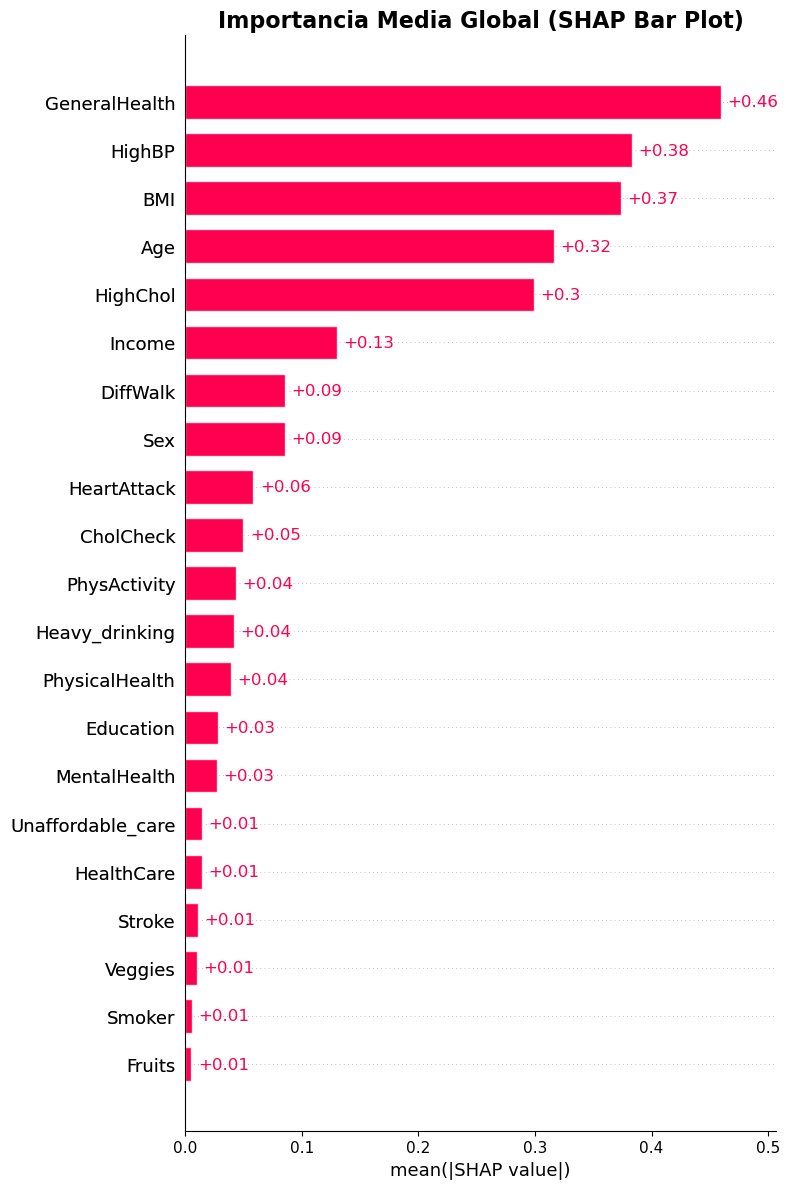

In [ ]:
#Gráfica de Barras (Importancia media absoluta) ---
plt.figure(figsize=(10, 5))
shap.plots.bar(shap_values, max_display=21, show=False)
plt.title("Importancia Media Global (SHAP Bar Plot)", fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

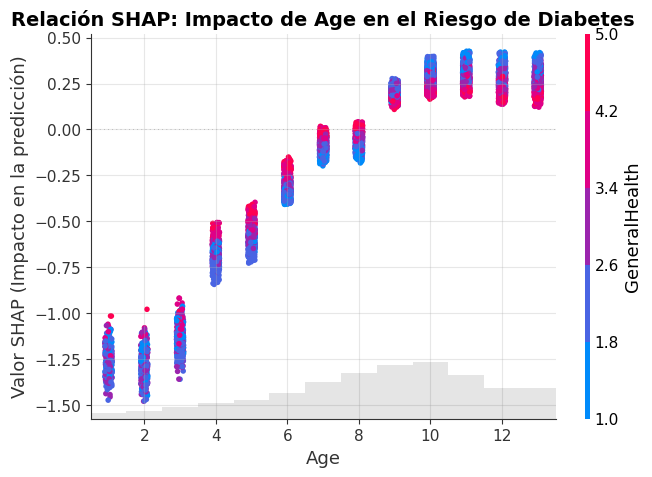

In [ ]:
# Valores de SHAP para una variable concreta, nos permite ver qué rangos o clases contribuyen más a ser diabético
plt.figure(figsize=(10, 6))

Nombre_var="Age" #Nombre de la variable que se desea estudiar
# El parámetro color=shap_values[:, "BMI"] añade una escala de color 
# para ver si hay interacción con otra variable (por defecto busca la más relacionada)
shap.plots.scatter(shap_values[:, Nombre_var], color=shap_values, show=False)# poner la variable que se desee

plt.title(f"Relación SHAP: Impacto de {Nombre_var} en el Riesgo de Diabetes", fontsize=14, weight='bold')
plt.ylabel("Valor SHAP (Impacto en la predicción)")
plt.grid(alpha=0.3)
plt.show()

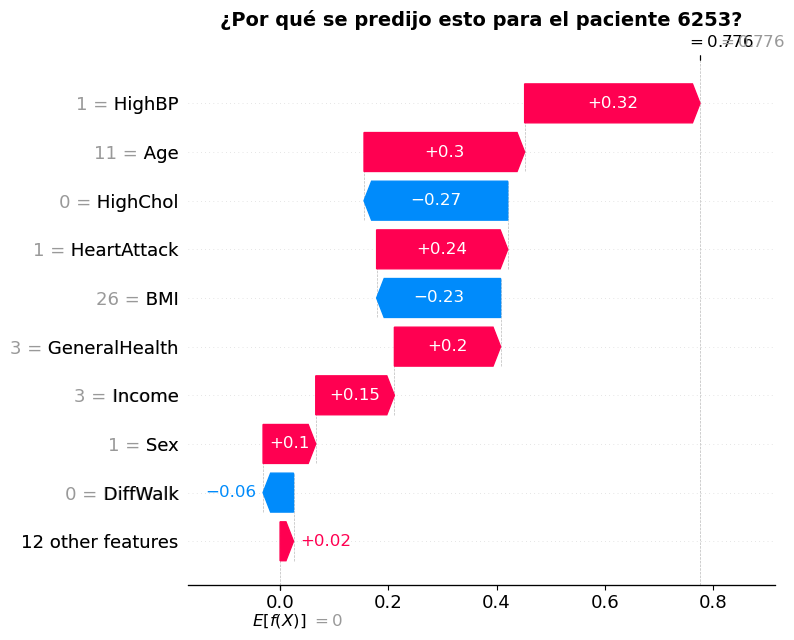

Etiqueta real: 1


In [ ]:
# --- 4. Gráfica Local "Waterfall" (Explicar UN caso concreto) ---
# Vamos a explicar por qué el modelo predijo lo que predijo para la PRIMERA persona del test.
# Cambia 'indice_paciente' para ver otros casos.
indice_paciente = 6253 #para ver un ejemplo de que no usar el 6253 por ejemplo

plt.figure(figsize=(10, 6))
# Usamos shap.plots.waterfall con el objeto Explanation de esa fila concreta
shap.plots.waterfall(shap_values[indice_paciente], show=False)
plt.title(f"¿Por qué se predijo esto para el paciente {indice_paciente}?", fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

print(f"Etiqueta real: {y_cv.iloc[indice_paciente]}")

To understand how each feature influences the model's decisions, we analyze the **SHAP values**. Since the training set is perfectly balanced, the **initial expected value (base value)** is **0**. 

The interpretation of the final output is as follows:
* **Positive SHAP Value (>0):** The feature pushes the prediction toward a **Diabetes** diagnosis. The higher the magnitude, the stronger the model's confidence in this outcome.
* **Negative SHAP Value (<0):** The feature pushes the prediction toward **No Diabetes**. 
* **Magnitude (Absolute Value):** Represents the "certainty" or strength of the influence. A value far from zero indicates that the feature significantly shifts the probability toward one of the two classes.